In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from torchvision import datasets, transforms
import time
import statistics
import sklearn.metrics
import seaborn as sns

In [2]:
mnist_training, mnist_testing = tf.keras.datasets.mnist.load_data()
training_data = np.float16(mnist_training[0])  # Returns np.array
training_labels = np.asarray(mnist_training[1], dtype=np.int32)
testing_data = np.float16(mnist_testing[0])  # Returns np.array
testing_labels = np.asarray(mnist_testing[1], dtype=np.int32)

In [3]:
feature_columns = [tf.feature_column.numeric_column("images", shape=[28, 28])]

train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"images": training_data},
    y= training_labels,
    num_epochs = None,
    batch_size = 50,
    shuffle = True
)

test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x = {"images": testing_data},
    y = testing_labels,
    num_epochs = 1,
    shuffle = False
)

In [4]:
def repeatedTrainingAndTesting(model_name, dropout, batch_normalization, M):
    
          
    classifier = tf.estimator.DNNClassifier(
        feature_columns = feature_columns,
        hidden_units = [100, 100],
        optimizer = 'Adam',
        n_classes = 10,
        dropout = dropout,
        model_dir="./models/"+model_name,
        batch_norm = batch_normalization
    )
    
    accuracies = []
    bestModel = None

    for i in range(M):
        
        totalTime = 0
        
        print('_______________________________________________________________________ M='+str(i+1))
        
        # TRAIN
        start_time = time.time()
        classifier.train(input_fn = train_input_fn, steps=5000)
        end_time = time.time()
        duration = end_time - start_time
        print("Training time: --- %s seconds ---" % (duration))
        totalTime += duration
        
        # TEST
        start_time = time.time()
        accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
        print("Testing Accuracy: {0:f}%\n".format(accuracy_score*100))
        print("Testing time: --- %s seconds ---" % (duration))
        accuracies.append(accuracy_score)
        
        
        if accuracy_score == max(accuracies):
            bestModel = classifier
        
    return (totalTime, bestModel)

In [5]:
def evaluate(bestModel, fileName):
    
    Y_pred = list(bestModel.predict(input_fn = test_input_fn))
    
    Y_pred_class = []
    
    for i in range(len(Y_pred)):
        Y_pred_class.append( Y_pred[i]['class_ids'].item() )

    
    confusion_mtx = tf.math.confusion_matrix(testing_labels, Y_pred_class) 
    
    f1 = sklearn.metrics.f1_score(testing_labels, Y_pred_class, average='weighted')
    accuracy = sklearn.metrics.accuracy_score(testing_labels, Y_pred_class)
    
    print(accuracy)

    plt.figure(figsize=(10, 8))
    svm = sns.heatmap(confusion_mtx, annot=True, fmt='g')
    figure = svm.get_figure()   
    figure.savefig(fileName)
    
    return (f1, accuracy)

# MLP

In [6]:
m = 50

## With Dropout, With Batch-Normalization

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './models/mlp_DO_BN', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
_______________________________________________________________________ M=1
Ins

INFO:tensorflow:global_step/sec: 416.049
INFO:tensorflow:loss = 0.0011430616, step = 419700 (0.240 sec)
INFO:tensorflow:global_step/sec: 422.248
INFO:tensorflow:loss = 0.0020228038, step = 419800 (0.236 sec)
INFO:tensorflow:global_step/sec: 424.869
INFO:tensorflow:loss = 0.003199983, step = 419900 (0.236 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 420000...
INFO:tensorflow:Saving checkpoints for 420000 into ./models/mlp_DO_BN\model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 420000...
INFO:tensorflow:Loss for final step: 0.0010754891.
Training time: --- 17.565815210342407 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T13:41:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-420000
INFO:tensorflo

INFO:tensorflow:Finished evaluation at 2022-09-29-13:42:12
INFO:tensorflow:Saving dict for global step 425000: accuracy = 0.9806, average_loss = 0.08988887, global_step = 425000, loss = 0.08889359
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 425000: ./models/mlp_DO_BN\model.ckpt-425000
Testing Accuracy: 98.060000%

Testing time: --- 15.86326813697815 seconds ---
_______________________________________________________________________ M=3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-425000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 425000...
INFO:tensorflow:Saving checkpoints for 425000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving che

INFO:tensorflow:global_step/sec: 417.805
INFO:tensorflow:loss = 0.029033199, step = 430400 (0.239 sec)
INFO:tensorflow:global_step/sec: 417.894
INFO:tensorflow:loss = 0.012366975, step = 430500 (0.240 sec)
INFO:tensorflow:global_step/sec: 419.53
INFO:tensorflow:loss = 0.025512941, step = 430600 (0.237 sec)
INFO:tensorflow:global_step/sec: 419.527
INFO:tensorflow:loss = 0.014395535, step = 430700 (0.238 sec)
INFO:tensorflow:global_step/sec: 417.781
INFO:tensorflow:loss = 0.018086813, step = 430800 (0.239 sec)
INFO:tensorflow:global_step/sec: 418.688
INFO:tensorflow:loss = 0.0028044123, step = 430900 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.567
INFO:tensorflow:loss = 0.041619997, step = 431000 (0.238 sec)
INFO:tensorflow:global_step/sec: 419.529
INFO:tensorflow:loss = 0.02341526, step = 431100 (0.238 sec)
INFO:tensorflow:global_step/sec: 416.047
INFO:tensorflow:loss = 0.0017478237, step = 431200 (0.240 sec)
INFO:tensorflow:global_step/sec: 421.281
INFO:tensorflow:loss = 0.0081773

INFO:tensorflow:loss = 0.031997796, step = 436700 (0.265 sec)
INFO:tensorflow:global_step/sec: 375.533
INFO:tensorflow:loss = 0.056732535, step = 436800 (0.266 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.0002432914, step = 436900 (0.265 sec)
INFO:tensorflow:global_step/sec: 373.228
INFO:tensorflow:loss = 0.0012600787, step = 437000 (0.269 sec)
INFO:tensorflow:global_step/sec: 370.103
INFO:tensorflow:loss = 0.09970516, step = 437100 (0.268 sec)
INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.0041281823, step = 437200 (0.266 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.0002997519, step = 437300 (0.263 sec)
INFO:tensorflow:global_step/sec: 381.242
INFO:tensorflow:loss = 0.006658182, step = 437400 (0.265 sec)
INFO:tensorflow:global_step/sec: 378.539
INFO:tensorflow:loss = 0.0060629607, step = 437500 (0.264 sec)
INFO:tensorflow:global_step/sec: 375.531
INFO:tensorflow:loss = 0.0008266956, step = 437600 (0.266 sec)
INFO:t

INFO:tensorflow:loss = 0.00040333788, step = 443000 (0.238 sec)
INFO:tensorflow:global_step/sec: 416.047
INFO:tensorflow:loss = 0.00061091385, step = 443100 (0.240 sec)
INFO:tensorflow:global_step/sec: 423.065
INFO:tensorflow:loss = 0.010364008, step = 443200 (0.236 sec)
INFO:tensorflow:global_step/sec: 419.534
INFO:tensorflow:loss = 0.0013091537, step = 443300 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.928
INFO:tensorflow:loss = 0.0011506256, step = 443400 (0.237 sec)
INFO:tensorflow:global_step/sec: 419.528
INFO:tensorflow:loss = 0.03570855, step = 443500 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.293
INFO:tensorflow:loss = 0.03233319, step = 443600 (0.237 sec)
INFO:tensorflow:global_step/sec: 421.291
INFO:tensorflow:loss = 0.019718744, step = 443700 (0.237 sec)
INFO:tensorflow:global_step/sec: 417.755
INFO:tensorflow:loss = 0.058377594, step = 443800 (0.238 sec)
INFO:tensorflow:global_step/sec: 419.555
INFO:tensorflow:loss = 0.0044603804, step = 443900 (0.239 sec)
INFO:t

INFO:tensorflow:loss = 0.0010033592, step = 449300 (0.239 sec)
INFO:tensorflow:global_step/sec: 423.068
INFO:tensorflow:loss = 0.035262503, step = 449400 (0.237 sec)
INFO:tensorflow:global_step/sec: 405.098
INFO:tensorflow:loss = 0.027194515, step = 449500 (0.248 sec)
INFO:tensorflow:global_step/sec: 407.018
INFO:tensorflow:loss = 0.000935054, step = 449600 (0.246 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.018589387, step = 449700 (0.240 sec)
INFO:tensorflow:global_step/sec: 426.669
INFO:tensorflow:loss = 0.0023811427, step = 449800 (0.234 sec)
INFO:tensorflow:global_step/sec: 426.668
INFO:tensorflow:loss = 0.0071465606, step = 449900 (0.234 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 450000...
INFO:tensorflow:Saving checkpoints for 450000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 450000...
INFO:tensorflow:Loss for final step: 0.0018542073.
Training time: --- 15.954

INFO:tensorflow:Inference Time : 0.44748s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:43:55
INFO:tensorflow:Saving dict for global step 455000: accuracy = 0.9804, average_loss = 0.091884896, global_step = 455000, loss = 0.09086839
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 455000: ./models/mlp_DO_BN\model.ckpt-455000
Testing Accuracy: 98.040003%

Testing time: --- 16.101252555847168 seconds ---
_______________________________________________________________________ M=9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-455000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 455000...
INFO:tensorflow:Saving checkpoints for 455000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:C

INFO:tensorflow:loss = 0.060064845, step = 460300 (0.284 sec)
INFO:tensorflow:global_step/sec: 356.366
INFO:tensorflow:loss = 0.045109905, step = 460400 (0.282 sec)
INFO:tensorflow:global_step/sec: 350.591
INFO:tensorflow:loss = 0.061543394, step = 460500 (0.286 sec)
INFO:tensorflow:global_step/sec: 356.803
INFO:tensorflow:loss = 0.0003051989, step = 460600 (0.279 sec)
INFO:tensorflow:global_step/sec: 350.531
INFO:tensorflow:loss = 0.0016888981, step = 460700 (0.287 sec)
INFO:tensorflow:global_step/sec: 351.817
INFO:tensorflow:loss = 0.0016425772, step = 460800 (0.281 sec)
INFO:tensorflow:global_step/sec: 353.191
INFO:tensorflow:loss = 0.005221704, step = 460900 (0.284 sec)
INFO:tensorflow:global_step/sec: 346.95
INFO:tensorflow:loss = 0.17311177, step = 461000 (0.289 sec)
INFO:tensorflow:global_step/sec: 359.38
INFO:tensorflow:loss = 0.0072962767, step = 461100 (0.278 sec)
INFO:tensorflow:global_step/sec: 359.383
INFO:tensorflow:loss = 0.0022313108, step = 461200 (0.277 sec)
INFO:tens

INFO:tensorflow:loss = 0.04284964, step = 466600 (0.242 sec)
INFO:tensorflow:global_step/sec: 410.933
INFO:tensorflow:loss = 0.009698997, step = 466700 (0.244 sec)
INFO:tensorflow:global_step/sec: 404.305
INFO:tensorflow:loss = 0.0015009731, step = 466800 (0.248 sec)
INFO:tensorflow:global_step/sec: 407.588
INFO:tensorflow:loss = 0.008166969, step = 466900 (0.243 sec)
INFO:tensorflow:global_step/sec: 419.531
INFO:tensorflow:loss = 0.029996835, step = 467000 (0.239 sec)
INFO:tensorflow:global_step/sec: 414.326
INFO:tensorflow:loss = 0.001064694, step = 467100 (0.241 sec)
INFO:tensorflow:global_step/sec: 417.782
INFO:tensorflow:loss = 0.0030882584, step = 467200 (0.239 sec)
INFO:tensorflow:global_step/sec: 417.78
INFO:tensorflow:loss = 0.004585715, step = 467300 (0.239 sec)
INFO:tensorflow:global_step/sec: 416.048
INFO:tensorflow:loss = 0.04995351, step = 467400 (0.239 sec)
INFO:tensorflow:global_step/sec: 410.637
INFO:tensorflow:loss = 0.0073349234, step = 467500 (0.245 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 412.625
INFO:tensorflow:loss = 0.004170604, step = 473000 (0.244 sec)
INFO:tensorflow:global_step/sec: 416.046
INFO:tensorflow:loss = 0.0022784937, step = 473100 (0.239 sec)
INFO:tensorflow:global_step/sec: 417.769
INFO:tensorflow:loss = 0.16009909, step = 473200 (0.239 sec)
INFO:tensorflow:global_step/sec: 417.274
INFO:tensorflow:loss = 0.04386924, step = 473300 (0.240 sec)
INFO:tensorflow:global_step/sec: 419.528
INFO:tensorflow:loss = 0.006451702, step = 473400 (0.237 sec)
INFO:tensorflow:global_step/sec: 417.781
INFO:tensorflow:loss = 0.02635823, step = 473500 (0.240 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.0042192317, step = 473600 (0.243 sec)
INFO:tensorflow:global_step/sec: 404.296
INFO:tensorflow:loss = 0.077483505, step = 473700 (0.247 sec)
INFO:tensorflow:global_step/sec: 416.055
INFO:tensorflow:loss = 0.0055919336, step = 473800 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.392
INFO:tensorflow:loss = 0.1485489

INFO:tensorflow:loss = 0.0024510585, step = 479300 (0.239 sec)
INFO:tensorflow:global_step/sec: 417.783
INFO:tensorflow:loss = 0.06593663, step = 479400 (0.239 sec)
INFO:tensorflow:global_step/sec: 419.529
INFO:tensorflow:loss = 0.00068061496, step = 479500 (0.238 sec)
INFO:tensorflow:global_step/sec: 417.78
INFO:tensorflow:loss = 0.04469572, step = 479600 (0.238 sec)
INFO:tensorflow:global_step/sec: 416.04
INFO:tensorflow:loss = 0.0014080334, step = 479700 (0.242 sec)
INFO:tensorflow:global_step/sec: 419.388
INFO:tensorflow:loss = 0.0005690697, step = 479800 (0.237 sec)
INFO:tensorflow:global_step/sec: 417.781
INFO:tensorflow:loss = 0.0074591427, step = 479900 (0.239 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 480000...
INFO:tensorflow:Saving checkpoints for 480000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 480000...
INFO:tensorflow:Loss for final step: 0.0039438354.
Training time: --- 16.0785

INFO:tensorflow:Inference Time : 0.44328s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:45:41
INFO:tensorflow:Saving dict for global step 485000: accuracy = 0.9817, average_loss = 0.0825955, global_step = 485000, loss = 0.08168098
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 485000: ./models/mlp_DO_BN\model.ckpt-485000
Testing Accuracy: 98.170000%

Testing time: --- 16.026318073272705 seconds ---
_______________________________________________________________________ M=15
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-485000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 485000...
INFO:tensorflow:Saving checkpoints for 485000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Ca

INFO:tensorflow:loss = 0.0020712595, step = 490300 (0.245 sec)
INFO:tensorflow:global_step/sec: 407.59
INFO:tensorflow:loss = 0.0045551057, step = 490400 (0.244 sec)
INFO:tensorflow:global_step/sec: 412.625
INFO:tensorflow:loss = 0.0106174555, step = 490500 (0.242 sec)
INFO:tensorflow:global_step/sec: 410.253
INFO:tensorflow:loss = 0.004954526, step = 490600 (0.243 sec)
INFO:tensorflow:global_step/sec: 393.202
INFO:tensorflow:loss = 0.0020192978, step = 490700 (0.256 sec)
INFO:tensorflow:global_step/sec: 381.247
INFO:tensorflow:loss = 0.0022240651, step = 490800 (0.260 sec)
INFO:tensorflow:global_step/sec: 412.621
INFO:tensorflow:loss = 0.0003732991, step = 490900 (0.243 sec)
INFO:tensorflow:global_step/sec: 354.303
INFO:tensorflow:loss = 0.0014267653, step = 491000 (0.281 sec)
INFO:tensorflow:global_step/sec: 409.255
INFO:tensorflow:loss = 0.002613122, step = 491100 (0.245 sec)
INFO:tensorflow:global_step/sec: 408.532
INFO:tensorflow:loss = 0.0005567643, step = 491200 (0.246 sec)
INFO

INFO:tensorflow:loss = 0.061635386, step = 496600 (0.243 sec)
INFO:tensorflow:global_step/sec: 413.506
INFO:tensorflow:loss = 0.00022665205, step = 496700 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.624
INFO:tensorflow:loss = 0.0005958529, step = 496800 (0.241 sec)
INFO:tensorflow:global_step/sec: 415.394
INFO:tensorflow:loss = 0.083754994, step = 496900 (0.243 sec)
INFO:tensorflow:global_step/sec: 412.625
INFO:tensorflow:loss = 0.0021125902, step = 497000 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.016328223, step = 497100 (0.241 sec)
INFO:tensorflow:global_step/sec: 413.9
INFO:tensorflow:loss = 0.018873472, step = 497200 (0.242 sec)
INFO:tensorflow:global_step/sec: 416.043
INFO:tensorflow:loss = 0.000108370084, step = 497300 (0.242 sec)
INFO:tensorflow:global_step/sec: 409.259
INFO:tensorflow:loss = 0.007349355, step = 497400 (0.243 sec)
INFO:tensorflow:global_step/sec: 412.621
INFO:tensorflow:loss = 0.013805227, step = 497500 (0.242 sec)
INFO:t

INFO:tensorflow:loss = 0.0005399475, step = 502900 (0.244 sec)
INFO:tensorflow:global_step/sec: 409.236
INFO:tensorflow:loss = 0.0153843975, step = 503000 (0.243 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.04615706, step = 503100 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.327
INFO:tensorflow:loss = 0.006496744, step = 503200 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.329
INFO:tensorflow:loss = 0.044812277, step = 503300 (0.242 sec)
INFO:tensorflow:global_step/sec: 409.255
INFO:tensorflow:loss = 0.00025241394, step = 503400 (0.244 sec)
INFO:tensorflow:global_step/sec: 412.935
INFO:tensorflow:loss = 0.044411268, step = 503500 (0.241 sec)
INFO:tensorflow:global_step/sec: 415.852
INFO:tensorflow:loss = 0.00075339666, step = 503600 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.00054416416, step = 503700 (0.241 sec)
INFO:tensorflow:global_step/sec: 409.246
INFO:tensorflow:loss = 0.0041425577, step = 503800 (0.247 sec)
INF

INFO:tensorflow:loss = 0.0049150004, step = 509200 (0.243 sec)
INFO:tensorflow:global_step/sec: 416.045
INFO:tensorflow:loss = 0.0037610938, step = 509300 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.481
INFO:tensorflow:loss = 0.00026105865, step = 509400 (0.241 sec)
INFO:tensorflow:global_step/sec: 415.473
INFO:tensorflow:loss = 0.0059499424, step = 509500 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.618
INFO:tensorflow:loss = 0.029242462, step = 509600 (0.242 sec)
INFO:tensorflow:global_step/sec: 414.589
INFO:tensorflow:loss = 0.00085661915, step = 509700 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.046
INFO:tensorflow:loss = 0.0016187275, step = 509800 (0.240 sec)
INFO:tensorflow:global_step/sec: 417.779
INFO:tensorflow:loss = 0.00058053504, step = 509900 (0.239 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 510000...
INFO:tensorflow:Saving checkpoints for 510000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.43631s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:47:24
INFO:tensorflow:Saving dict for global step 515000: accuracy = 0.9833, average_loss = 0.08272898, global_step = 515000, loss = 0.081814654
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 515000: ./models/mlp_DO_BN\model.ckpt-515000
Testing Accuracy: 98.329997%

Testing time: --- 15.953850030899048 seconds ---
_______________________________________________________________________ M=21
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-515000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 515000...
INFO:tensorflow

INFO:tensorflow:loss = 0.0068876464, step = 520200 (0.250 sec)
INFO:tensorflow:global_step/sec: 407.591
INFO:tensorflow:loss = 0.00034850574, step = 520300 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.00038458928, step = 520400 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.931
INFO:tensorflow:loss = 0.003889835, step = 520500 (0.243 sec)
INFO:tensorflow:global_step/sec: 401.07
INFO:tensorflow:loss = 0.034845013, step = 520600 (0.250 sec)
INFO:tensorflow:global_step/sec: 409.254
INFO:tensorflow:loss = 0.00042001062, step = 520700 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.925
INFO:tensorflow:loss = 0.0017337186, step = 520800 (0.242 sec)
INFO:tensorflow:global_step/sec: 399.771
INFO:tensorflow:loss = 0.00020426017, step = 520900 (0.252 sec)
INFO:tensorflow:global_step/sec: 407.593
INFO:tensorflow:loss = 0.0026106162, step = 521000 (0.244 sec)
INFO:tensorflow:global_step/sec: 409.254
INFO:tensorflow:loss = 0.018256957, step = 521100 (0.244 sec)
I

INFO:tensorflow:global_step/sec: 404.301
INFO:tensorflow:loss = 0.0014711166, step = 526600 (0.246 sec)
INFO:tensorflow:global_step/sec: 415.434
INFO:tensorflow:loss = 0.00048737443, step = 526700 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.0013396164, step = 526800 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.622
INFO:tensorflow:loss = 0.00019565849, step = 526900 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.616
INFO:tensorflow:loss = 0.0017049167, step = 527000 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.337
INFO:tensorflow:loss = 0.015658623, step = 527100 (0.243 sec)
INFO:tensorflow:global_step/sec: 416.048
INFO:tensorflow:loss = 0.0003273339, step = 527200 (0.241 sec)
INFO:tensorflow:global_step/sec: 408.55
INFO:tensorflow:loss = 0.053289156, step = 527300 (0.244 sec)
INFO:tensorflow:global_step/sec: 414.33
INFO:tensorflow:loss = 0.0017527436, step = 527400 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.325
INFO:tensorflow:loss = 0.

INFO:tensorflow:loss = 0.00029717732, step = 532900 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.95
INFO:tensorflow:loss = 0.011552346, step = 533000 (0.244 sec)
INFO:tensorflow:global_step/sec: 407.594
INFO:tensorflow:loss = 0.001975649, step = 533100 (0.244 sec)
INFO:tensorflow:global_step/sec: 415.636
INFO:tensorflow:loss = 0.0035285568, step = 533200 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.06686715, step = 533300 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.613
INFO:tensorflow:loss = 0.00010320979, step = 533400 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.335
INFO:tensorflow:loss = 0.026767025, step = 533500 (0.242 sec)
INFO:tensorflow:global_step/sec: 410.936
INFO:tensorflow:loss = 0.017944712, step = 533600 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.931
INFO:tensorflow:loss = 0.011866165, step = 533700 (0.243 sec)
INFO:tensorflow:global_step/sec: 409.255
INFO:tensorflow:loss = 0.0005093143, step = 533800 (0.245 sec)
INFO:te

INFO:tensorflow:loss = 0.04034294, step = 539200 (0.246 sec)
INFO:tensorflow:global_step/sec: 397.886
INFO:tensorflow:loss = 0.013783582, step = 539300 (0.251 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.086613454, step = 539400 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.0015213852, step = 539500 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.002013031, step = 539600 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.00048148446, step = 539700 (0.242 sec)
INFO:tensorflow:global_step/sec: 410.204
INFO:tensorflow:loss = 0.00058512343, step = 539800 (0.244 sec)
INFO:tensorflow:global_step/sec: 414.318
INFO:tensorflow:loss = 0.052304775, step = 539900 (0.241 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 540000...
INFO:tensorflow:Saving checkpoints for 540000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.45681s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:49:07
INFO:tensorflow:Saving dict for global step 545000: accuracy = 0.981, average_loss = 0.088634, global_step = 545000, loss = 0.08765247
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 545000: ./models/mlp_DO_BN\model.ckpt-545000
Testing Accuracy: 98.100001%

Testing time: --- 16.23000478744507 seconds ---
_______________________________________________________________________ M=27
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-545000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 545000...
INFO:tensorflow:Savi

INFO:tensorflow:global_step/sec: 302.921
INFO:tensorflow:loss = 0.003378772, step = 550300 (0.331 sec)
INFO:tensorflow:global_step/sec: 319.324
INFO:tensorflow:loss = 0.0005758699, step = 550400 (0.312 sec)
INFO:tensorflow:global_step/sec: 297.529
INFO:tensorflow:loss = 0.015947612, step = 550500 (0.336 sec)
INFO:tensorflow:global_step/sec: 305.691
INFO:tensorflow:loss = 0.0046681953, step = 550600 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.689
INFO:tensorflow:loss = 0.008310955, step = 550700 (0.322 sec)
INFO:tensorflow:global_step/sec: 316.3
INFO:tensorflow:loss = 0.00067921996, step = 550800 (0.316 sec)
INFO:tensorflow:global_step/sec: 319.323
INFO:tensorflow:loss = 6.9187394e-05, step = 550900 (0.313 sec)
INFO:tensorflow:global_step/sec: 323.444
INFO:tensorflow:loss = 0.0033846356, step = 551000 (0.309 sec)
INFO:tensorflow:global_step/sec: 321.37
INFO:tensorflow:loss = 0.066411234, step = 551100 (0.310 sec)
INFO:tensorflow:global_step/sec: 280.03
INFO:tensorflow:loss = 0.0146

INFO:tensorflow:global_step/sec: 407.59
INFO:tensorflow:loss = 0.0013988278, step = 556600 (0.244 sec)
INFO:tensorflow:global_step/sec: 408.979
INFO:tensorflow:loss = 0.026028099, step = 556700 (0.245 sec)
INFO:tensorflow:global_step/sec: 410.914
INFO:tensorflow:loss = 0.007082069, step = 556800 (0.244 sec)
INFO:tensorflow:global_step/sec: 407.608
INFO:tensorflow:loss = 0.007205901, step = 556900 (0.246 sec)
INFO:tensorflow:global_step/sec: 407.59
INFO:tensorflow:loss = 0.0047297995, step = 557000 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.927
INFO:tensorflow:loss = 0.018056847, step = 557100 (0.242 sec)
INFO:tensorflow:global_step/sec: 409.259
INFO:tensorflow:loss = 0.019889725, step = 557200 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.933
INFO:tensorflow:loss = 0.03359312, step = 557300 (0.243 sec)
INFO:tensorflow:global_step/sec: 409.254
INFO:tensorflow:loss = 0.0003870359, step = 557400 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.933
INFO:tensorflow:loss = 0.0034750

INFO:tensorflow:global_step/sec: 408.432
INFO:tensorflow:loss = 0.00044815402, step = 562900 (0.245 sec)
INFO:tensorflow:global_step/sec: 407.607
INFO:tensorflow:loss = 0.0006357162, step = 563000 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.0023812482, step = 563100 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.931
INFO:tensorflow:loss = 0.002621122, step = 563200 (0.242 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.0006997555, step = 563300 (0.245 sec)
INFO:tensorflow:global_step/sec: 409.252
INFO:tensorflow:loss = 0.010927975, step = 563400 (0.243 sec)
INFO:tensorflow:global_step/sec: 404.972
INFO:tensorflow:loss = 0.0019771715, step = 563500 (0.246 sec)
INFO:tensorflow:global_step/sec: 410.933
INFO:tensorflow:loss = 0.008605842, step = 563600 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.083438024, step = 563700 (0.243 sec)
INFO:tensorflow:global_step/sec: 405.94
INFO:tensorflow:loss = 0.00

INFO:tensorflow:global_step/sec: 414.321
INFO:tensorflow:loss = 0.0035467832, step = 569200 (0.242 sec)
INFO:tensorflow:global_step/sec: 414.334
INFO:tensorflow:loss = 0.058781978, step = 569300 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.048
INFO:tensorflow:loss = 0.01234613, step = 569400 (0.239 sec)
INFO:tensorflow:global_step/sec: 417.78
INFO:tensorflow:loss = 0.0023287844, step = 569500 (0.240 sec)
INFO:tensorflow:global_step/sec: 413.284
INFO:tensorflow:loss = 0.03551334, step = 569600 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.046
INFO:tensorflow:loss = 0.0004890556, step = 569700 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.049
INFO:tensorflow:loss = 0.0011716842, step = 569800 (0.239 sec)
INFO:tensorflow:global_step/sec: 414.327
INFO:tensorflow:loss = 0.0015593314, step = 569900 (0.243 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 570000...
INFO:tensorflow:Saving checkpoints for 570000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorf

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.44983s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:50:53
INFO:tensorflow:Saving dict for global step 575000: accuracy = 0.981, average_loss = 0.09148854, global_step = 575000, loss = 0.09048333
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 575000: ./models/mlp_DO_BN\model.ckpt-575000
Testing Accuracy: 98.100001%

Testing time: --- 16.066487789154053 seconds ---
_______________________________________________________________________ M=33
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-575000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 575000...
INFO:tensorflow:S

INFO:tensorflow:loss = 0.03340806, step = 580200 (0.244 sec)
INFO:tensorflow:global_step/sec: 414.33
INFO:tensorflow:loss = 0.10994902, step = 580300 (0.241 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.002806903, step = 580400 (0.242 sec)
INFO:tensorflow:global_step/sec: 416.037
INFO:tensorflow:loss = 0.0071912594, step = 580500 (0.241 sec)
INFO:tensorflow:global_step/sec: 410.943
INFO:tensorflow:loss = 0.042915955, step = 580600 (0.243 sec)
INFO:tensorflow:global_step/sec: 414.326
INFO:tensorflow:loss = 0.029723315, step = 580700 (0.241 sec)
INFO:tensorflow:global_step/sec: 411.939
INFO:tensorflow:loss = 0.0065774117, step = 580800 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.622
INFO:tensorflow:loss = 0.025009843, step = 580900 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.0056670476, step = 581000 (0.244 sec)
INFO:tensorflow:global_step/sec: 412.621
INFO:tensorflow:loss = 0.0012305315, step = 581100 (0.241 sec)
INFO:tenso

INFO:tensorflow:loss = 0.060882024, step = 586500 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.0038841865, step = 586600 (0.242 sec)
INFO:tensorflow:global_step/sec: 416.045
INFO:tensorflow:loss = 0.0103563825, step = 586700 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.329
INFO:tensorflow:loss = 0.00063656556, step = 586800 (0.241 sec)
INFO:tensorflow:global_step/sec: 411.855
INFO:tensorflow:loss = 0.00053702126, step = 586900 (0.242 sec)
INFO:tensorflow:global_step/sec: 417.781
INFO:tensorflow:loss = 0.0108403815, step = 587000 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.0058789463, step = 587100 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.624
INFO:tensorflow:loss = 0.0012354844, step = 587200 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.04
INFO:tensorflow:loss = 0.0029131677, step = 587300 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.334
INFO:tensorflow:loss = 0.0014604762, step = 587400 (0.241 sec)
I

INFO:tensorflow:loss = 0.008620273, step = 592800 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.946
INFO:tensorflow:loss = 0.006708382, step = 592900 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.567
INFO:tensorflow:loss = 0.00091265247, step = 593000 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.326
INFO:tensorflow:loss = 0.0015271193, step = 593100 (0.242 sec)
INFO:tensorflow:global_step/sec: 405.768
INFO:tensorflow:loss = 0.0029385784, step = 593200 (0.246 sec)
INFO:tensorflow:global_step/sec: 414.329
INFO:tensorflow:loss = 0.0011467623, step = 593300 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.0009341112, step = 593400 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.00012441263, step = 593500 (0.243 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.0062525882, step = 593600 (0.242 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.0031606876, step = 593700 (0.267 sec)
I

INFO:tensorflow:loss = 0.001131454, step = 599100 (0.243 sec)
INFO:tensorflow:global_step/sec: 409.255
INFO:tensorflow:loss = 0.024603812, step = 599200 (0.245 sec)
INFO:tensorflow:global_step/sec: 409.253
INFO:tensorflow:loss = 0.0012883146, step = 599300 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.934
INFO:tensorflow:loss = 0.012336176, step = 599400 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.622
INFO:tensorflow:loss = 0.00030856315, step = 599500 (0.242 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.057111584, step = 599600 (0.242 sec)
INFO:tensorflow:global_step/sec: 409.255
INFO:tensorflow:loss = 0.007637435, step = 599700 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.927
INFO:tensorflow:loss = 0.0031933915, step = 599800 (0.244 sec)
INFO:tensorflow:global_step/sec: 409.258
INFO:tensorflow:loss = 0.00095618033, step = 599900 (0.244 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600000...
INFO:tensorflow:Saving check

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-605000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.44282s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:52:35
INFO:tensorflow:Saving dict for global step 605000: accuracy = 0.9808, average_loss = 0.088975295, global_step = 605000, loss = 0.0880427
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 605000: ./models/mlp_DO_BN\model.ckpt-605000
Testing Accuracy: 98.079997%

Testing time: --- 16.198237657546997 seconds ---
_______________________________________________________________________ M=39
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-605000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done run

INFO:tensorflow:loss = 0.0014275594, step = 610100 (0.326 sec)
INFO:tensorflow:global_step/sec: 407.737
INFO:tensorflow:loss = 0.00029638925, step = 610200 (0.245 sec)
INFO:tensorflow:global_step/sec: 416.223
INFO:tensorflow:loss = 0.00017637946, step = 610300 (0.240 sec)
INFO:tensorflow:global_step/sec: 413.896
INFO:tensorflow:loss = 0.0020989508, step = 610400 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.037
INFO:tensorflow:loss = 0.0891662, step = 610500 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.0013281895, step = 610600 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.326
INFO:tensorflow:loss = 0.0048845736, step = 610700 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.33
INFO:tensorflow:loss = 0.0015801635, step = 610800 (0.242 sec)
INFO:tensorflow:global_step/sec: 405.938
INFO:tensorflow:loss = 0.037659887, step = 610900 (0.246 sec)
INFO:tensorflow:global_step/sec: 412.626
INFO:tensorflow:loss = 0.009087811, step = 611000 (0.242 sec)
INFO:

INFO:tensorflow:loss = 0.0005783638, step = 616400 (0.242 sec)
INFO:tensorflow:global_step/sec: 416.048
INFO:tensorflow:loss = 0.0053458656, step = 616500 (0.241 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.0007666788, step = 616600 (0.241 sec)
INFO:tensorflow:global_step/sec: 410.248
INFO:tensorflow:loss = 0.019243293, step = 616700 (0.244 sec)
INFO:tensorflow:global_step/sec: 414.33
INFO:tensorflow:loss = 0.005268665, step = 616800 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.048
INFO:tensorflow:loss = 0.019243153, step = 616900 (0.240 sec)
INFO:tensorflow:global_step/sec: 416.045
INFO:tensorflow:loss = 0.00063593686, step = 617000 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.19
INFO:tensorflow:loss = 0.0006142436, step = 617100 (0.241 sec)
INFO:tensorflow:global_step/sec: 417.788
INFO:tensorflow:loss = 0.011086787, step = 617200 (0.239 sec)
INFO:tensorflow:global_step/sec: 415.36
INFO:tensorflow:loss = 6.073076e-05, step = 617300 (0.241 sec)
INFO:te

INFO:tensorflow:global_step/sec: 410.934
INFO:tensorflow:loss = 0.008790856, step = 622500 (0.244 sec)
INFO:tensorflow:global_step/sec: 409.229
INFO:tensorflow:loss = 0.0009907836, step = 622600 (0.244 sec)
INFO:tensorflow:global_step/sec: 412.75
INFO:tensorflow:loss = 0.08468365, step = 622700 (0.242 sec)
INFO:tensorflow:global_step/sec: 414.329
INFO:tensorflow:loss = 0.011215423, step = 622800 (0.241 sec)
INFO:tensorflow:global_step/sec: 409.256
INFO:tensorflow:loss = 0.0073806387, step = 622900 (0.244 sec)
INFO:tensorflow:global_step/sec: 412.617
INFO:tensorflow:loss = 0.00051578425, step = 623000 (0.242 sec)
INFO:tensorflow:global_step/sec: 410.936
INFO:tensorflow:loss = 0.006753415, step = 623100 (0.243 sec)
INFO:tensorflow:global_step/sec: 346.945
INFO:tensorflow:loss = 0.00020580075, step = 623200 (0.288 sec)
INFO:tensorflow:global_step/sec: 397.304
INFO:tensorflow:loss = 0.013978802, step = 623300 (0.252 sec)
INFO:tensorflow:global_step/sec: 397.885
INFO:tensorflow:loss = 0.003

INFO:tensorflow:global_step/sec: 390.077
INFO:tensorflow:loss = 0.0008564299, step = 628800 (0.256 sec)
INFO:tensorflow:global_step/sec: 330.916
INFO:tensorflow:loss = 0.0010549761, step = 628900 (0.303 sec)
INFO:tensorflow:global_step/sec: 410.933
INFO:tensorflow:loss = 0.0007833335, step = 629000 (0.244 sec)
INFO:tensorflow:global_step/sec: 407.591
INFO:tensorflow:loss = 0.015962655, step = 629100 (0.243 sec)
INFO:tensorflow:global_step/sec: 406.967
INFO:tensorflow:loss = 0.018680157, step = 629200 (0.247 sec)
INFO:tensorflow:global_step/sec: 410.927
INFO:tensorflow:loss = 0.0146395955, step = 629300 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.937
INFO:tensorflow:loss = 0.011627679, step = 629400 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.618
INFO:tensorflow:loss = 0.00018809414, step = 629500 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.937
INFO:tensorflow:loss = 0.00038938381, step = 629600 (0.243 sec)
INFO:tensorflow:global_step/sec: 384.163
INFO:tensorflow:loss = 0

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 635000...
INFO:tensorflow:Loss for final step: 0.00023291394.
Training time: --- 16.05810570716858 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T13:54:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-635000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.44381s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:54:18
INFO:tensorflow:Saving dict for global step 635000: accuracy = 0.9812, average_loss = 0.096994, global_step = 635000, loss = 0.09595275
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 635000: ./models/mlp_DO_BN\model.ckpt-635000
Testing Accuracy: 98.119998%

Testing time: --- 16.05810570716858 seconds ---
_______________________________________________________________

INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 640000...
INFO:tensorflow:Saving checkpoints for 640000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 640000...
INFO:tensorflow:loss = 0.00011876535, step = 640000
INFO:tensorflow:global_step/sec: 312.359
INFO:tensorflow:loss = 0.055845357, step = 640100 (0.323 sec)
INFO:tensorflow:global_step/sec: 410.933
INFO:tensorflow:loss = 0.0017148101, step = 640200 (0.243 sec)
INFO:tensorflow:global_step/sec: 416.048
INFO:tensorflow:loss = 0.26063082, step = 640300 (0.240 sec)
INFO:tensorflow:global_step/sec: 412.624
INFO:tensorflow:loss = 0.011869449, step = 640400 (0.241 sec)
INFO:tensorflow:global_step/sec: 413.545
INFO:tensorflow:loss = 0.009262946, step = 640500 (0.243 sec)
INFO:tensorflow:global_step/sec: 416.054
INFO:tensorflow:loss = 0.0009426896, step = 640600 (0.239 sec)
INFO:tensorflow:global_step/sec: 410.933
INFO:tensorflow:loss = 0.0013197146, step = 640

INFO:tensorflow:loss = 0.0062025576, step = 646100 (0.264 sec)
INFO:tensorflow:global_step/sec: 391.693
INFO:tensorflow:loss = 0.000700039, step = 646200 (0.253 sec)
INFO:tensorflow:global_step/sec: 410.317
INFO:tensorflow:loss = 0.017168943, step = 646300 (0.244 sec)
INFO:tensorflow:global_step/sec: 412.632
INFO:tensorflow:loss = 0.00030490477, step = 646400 (0.242 sec)
INFO:tensorflow:global_step/sec: 407.59
INFO:tensorflow:loss = 0.0006961916, step = 646500 (0.247 sec)
INFO:tensorflow:global_step/sec: 399.467
INFO:tensorflow:loss = 0.09179626, step = 646600 (0.248 sec)
INFO:tensorflow:global_step/sec: 412.626
INFO:tensorflow:loss = 0.0015391996, step = 646700 (0.242 sec)
INFO:tensorflow:global_step/sec: 409.255
INFO:tensorflow:loss = 0.06942437, step = 646800 (0.246 sec)
INFO:tensorflow:global_step/sec: 408.439
INFO:tensorflow:loss = 0.004475868, step = 646900 (0.243 sec)
INFO:tensorflow:global_step/sec: 414.322
INFO:tensorflow:loss = 0.00029268782, step = 647000 (0.241 sec)
INFO:te

INFO:tensorflow:loss = 0.0003911479, step = 652400 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.93
INFO:tensorflow:loss = 0.0006174053, step = 652500 (0.243 sec)
INFO:tensorflow:global_step/sec: 410.934
INFO:tensorflow:loss = 0.0016948436, step = 652600 (0.243 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.000114186834, step = 652700 (0.242 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 0.05978395, step = 652800 (0.241 sec)
INFO:tensorflow:global_step/sec: 411.801
INFO:tensorflow:loss = 0.0052439785, step = 652900 (0.243 sec)
INFO:tensorflow:global_step/sec: 414.33
INFO:tensorflow:loss = 0.0027465993, step = 653000 (0.241 sec)
INFO:tensorflow:global_step/sec: 401.069
INFO:tensorflow:loss = 0.00066329865, step = 653100 (0.249 sec)
INFO:tensorflow:global_step/sec: 409.252
INFO:tensorflow:loss = 0.0096039, step = 653200 (0.244 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.014104743, step = 653300 (0.242 sec)
INFO:t

INFO:tensorflow:loss = 0.013191248, step = 658700 (0.243 sec)
INFO:tensorflow:global_step/sec: 414.33
INFO:tensorflow:loss = 0.0582932, step = 658800 (0.241 sec)
INFO:tensorflow:global_step/sec: 408.849
INFO:tensorflow:loss = 0.00049934234, step = 658900 (0.245 sec)
INFO:tensorflow:global_step/sec: 415.253
INFO:tensorflow:loss = 0.00041001954, step = 659000 (0.241 sec)
INFO:tensorflow:global_step/sec: 412.533
INFO:tensorflow:loss = 0.14826983, step = 659100 (0.242 sec)
INFO:tensorflow:global_step/sec: 414.031
INFO:tensorflow:loss = 0.0012012923, step = 659200 (0.242 sec)
INFO:tensorflow:global_step/sec: 410.93
INFO:tensorflow:loss = 0.0011836649, step = 659300 (0.244 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.0045856703, step = 659400 (0.240 sec)
INFO:tensorflow:global_step/sec: 416.045
INFO:tensorflow:loss = 0.028290726, step = 659500 (0.240 sec)
INFO:tensorflow:global_step/sec: 414.951
INFO:tensorflow:loss = 0.0009242548, step = 659600 (0.243 sec)
INFO:ten

INFO:tensorflow:Saving checkpoints for 665000 into ./models/mlp_DO_BN\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 665000...
INFO:tensorflow:Loss for final step: 0.0010654655.
Training time: --- 16.161444187164307 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T13:56:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO_BN\model.ckpt-665000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.44433s
INFO:tensorflow:Finished evaluation at 2022-09-29-13:56:02
INFO:tensorflow:Saving dict for global step 665000: accuracy = 0.9812, average_loss = 0.094326995, global_step = 665000, loss = 0.09331062
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 665000: ./models/mlp_DO_BN\model.ckpt-665000
Testing Accuracy: 98.119998%

Testing time: --- 16.16144

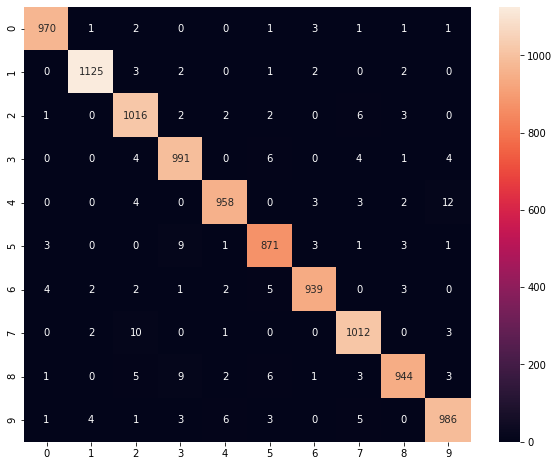

In [7]:
(time_DO_BN, bestModel_DO_BN) = repeatedTrainingAndTesting(model_name = "mlp_DO_BN", dropout = 0.2, batch_normalization = True, M=m)
(top_f1_DO_BN, top_accuracy_DO_BN) = evaluate(bestModel_DO_BN, 'outputs/MLP_heatmap_DO_BN.png')

# Without Dropout, With Batch-Normalization

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/MLP_BN\model.ckpt-520000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.982


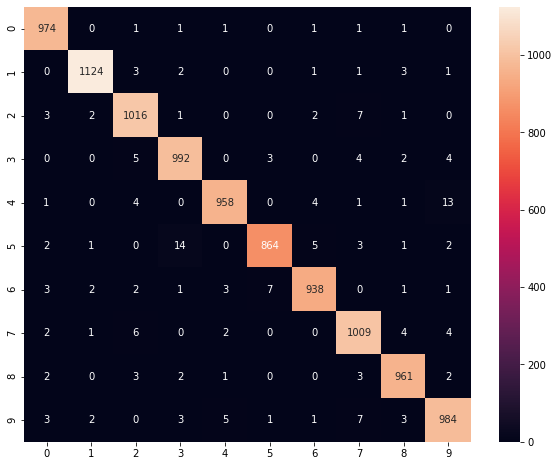

In [13]:
#(time_BN, bestModel_BN) = repeatedTrainingAndTesting(model_name = "MLP_BN", dropout = None, batch_normalization = True, M=m)
(top_f1_BN, top_accuracy_BN) = evaluate(bestModel_BN, 'outputs/MLP_heatmap_BN.png')

# With Dropout, Without Batch-Normalization

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './models/mlp_DO', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
_______________________________________________________________________ M=1
INFO:t

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 275000...
INFO:tensorflow:loss = 0.009988428, step = 275000
INFO:tensorflow:global_step/sec: 409.258
INFO:tensorflow:loss = 0.101186894, step = 275100 (0.246 sec)
INFO:tensorflow:global_step/sec: 501.342
INFO:tensorflow:loss = 0.17482443, step = 275200 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.339
INFO:tensorflow:loss = 0.08115899, step = 275300 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.333
INFO:tensorflow:loss = 0.11496514, step = 275400 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.323
INFO:tensorflow:loss = 0.085823275, step = 275500 (0.199 sec)
INFO:tensorflow:global_step/sec: 497.717
INFO:tensorflow:loss = 0.057127744, step = 275600 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.329
INFO:tensorflow:loss = 0.13131514, step = 275700 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.854
INFO:tensorflow:loss = 0.10350166, step = 275800 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.333
INFO:tensor

INFO:tensorflow:global_step/sec: 404.303
INFO:tensorflow:loss = 0.06392668, step = 281400 (0.247 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.12747501, step = 281500 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.057145063, step = 281600 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.371
INFO:tensorflow:loss = 0.48035073, step = 281700 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.08221875, step = 281800 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.329
INFO:tensorflow:loss = 0.18422337, step = 281900 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.853
INFO:tensorflow:loss = 0.16251129, step = 282000 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.828
INFO:tensorflow:loss = 0.009754658, step = 282100 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.349
INFO:tensorflow:loss = 0.14040264, step = 282200 (0.198 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.26591593, step

INFO:tensorflow:global_step/sec: 491.508
INFO:tensorflow:loss = 0.07480583, step = 287800 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.927
INFO:tensorflow:loss = 0.16234788, step = 287900 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.1534132, step = 288000 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.36
INFO:tensorflow:loss = 0.3246554, step = 288100 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.33
INFO:tensorflow:loss = 0.058906008, step = 288200 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.038531758, step = 288300 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.18745223, step = 288400 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.099692576, step = 288500 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.048790097, step = 288600 (0.200 sec)
INFO:tensorflow:global_step/sec: 489.08
INFO:tensorflow:loss = 0.021125315, step = 

INFO:tensorflow:global_step/sec: 485.623
INFO:tensorflow:loss = 0.103378735, step = 294200 (0.206 sec)
INFO:tensorflow:global_step/sec: 491.505
INFO:tensorflow:loss = 0.13182679, step = 294300 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.725
INFO:tensorflow:loss = 0.008711698, step = 294400 (0.204 sec)
INFO:tensorflow:global_step/sec: 490.724
INFO:tensorflow:loss = 0.4509133, step = 294500 (0.204 sec)
INFO:tensorflow:global_step/sec: 496.377
INFO:tensorflow:loss = 0.17539637, step = 294600 (0.201 sec)
INFO:tensorflow:global_step/sec: 486.734
INFO:tensorflow:loss = 0.071966484, step = 294700 (0.206 sec)
INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 0.13567902, step = 294800 (0.202 sec)
INFO:tensorflow:global_step/sec: 494.306
INFO:tensorflow:loss = 0.060821123, step = 294900 (0.202 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 295000...
INFO:tensorflow:Saving checkpoints for 295000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Callin

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.39703s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:11:42
INFO:tensorflow:Saving dict for global step 300000: accuracy = 0.9595, average_loss = 0.50817955, global_step = 300000, loss = 0.50268257
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 300000: ./models/mlp_DO\model.ckpt-300000
Testing Accuracy: 95.950001%

Testing time: --- 12.860880136489868 seconds ---
_______________________________________________________________________ M=7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-300000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 300000...
INFO:tensorflow:Saving checkpoints for 300000 into ./models/ml

INFO:tensorflow:global_step/sec: 490.593
INFO:tensorflow:loss = 0.041844144, step = 305400 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.171
INFO:tensorflow:loss = 0.004481497, step = 305500 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.16553572, step = 305600 (0.201 sec)
INFO:tensorflow:global_step/sec: 443.66
INFO:tensorflow:loss = 0.14854027, step = 305700 (0.227 sec)
INFO:tensorflow:global_step/sec: 482.056
INFO:tensorflow:loss = 0.18218687, step = 305800 (0.207 sec)
INFO:tensorflow:global_step/sec: 489.111
INFO:tensorflow:loss = 0.12165254, step = 305900 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.371
INFO:tensorflow:loss = 0.03131366, step = 306000 (0.201 sec)
INFO:tensorflow:global_step/sec: 494.531
INFO:tensorflow:loss = 0.0818179, step = 306100 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.931
INFO:tensorflow:loss = 0.038860135, step = 306200 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.022794876, step

INFO:tensorflow:global_step/sec: 493.937
INFO:tensorflow:loss = 0.11321902, step = 311800 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.925
INFO:tensorflow:loss = 0.094438426, step = 311900 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.13526887, step = 312000 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.845
INFO:tensorflow:loss = 0.24166793, step = 312100 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.15024982, step = 312200 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.11090462, step = 312300 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.21610606, step = 312400 (0.202 sec)
INFO:tensorflow:global_step/sec: 499.372
INFO:tensorflow:loss = 0.016680464, step = 312500 (0.205 sec)
INFO:tensorflow:global_step/sec: 486.683
INFO:tensorflow:loss = 0.17578569, step = 312600 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.811
INFO:tensorflow:loss = 0.027619505, ste

INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.08676758, step = 318200 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.927
INFO:tensorflow:loss = 0.12905334, step = 318300 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.24466752, step = 318400 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.368
INFO:tensorflow:loss = 0.011370279, step = 318500 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.932
INFO:tensorflow:loss = 0.042719267, step = 318600 (0.202 sec)
INFO:tensorflow:global_step/sec: 501.33
INFO:tensorflow:loss = 0.14457498, step = 318700 (0.199 sec)
INFO:tensorflow:global_step/sec: 492.933
INFO:tensorflow:loss = 0.11059204, step = 318800 (0.203 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.115440845, step = 318900 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.838
INFO:tensorflow:loss = 0.2670042, step = 319000 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 0.010966785, step

INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.06897717, step = 324600 (0.204 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.030312829, step = 324700 (0.201 sec)
INFO:tensorflow:global_step/sec: 490.428
INFO:tensorflow:loss = 0.1609365, step = 324800 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.4036764, step = 324900 (0.202 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 325000...
INFO:tensorflow:Saving checkpoints for 325000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 325000...
INFO:tensorflow:Loss for final step: 0.10597022.
Training time: --- 13.147917747497559 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:12:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-325000
INFO:tenso

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-330000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 330000...
INFO:tensorflow:Saving checkpoints for 330000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 330000...
INFO:tensorflow:loss = 0.015653552, step = 330000
INFO:tensorflow:global_step/sec: 393.206
INFO:tensorflow:loss = 0.3041771, step = 330100 (0.257 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.07468591, step = 330200 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.54382896, step = 330300 (0.202 sec)
INFO:tensorflow:global_step/sec: 490.438
INFO:tensorflow:loss = 0.20948225, step = 330400 (0.205 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.015887668, step = 335900 (0.203 sec)
INFO:tensorflow:global_step/sec: 501.335
INFO:tensorflow:loss = 0.07699722, step = 336000 (0.199 sec)
INFO:tensorflow:global_step/sec: 496.372
INFO:tensorflow:loss = 0.009637694, step = 336100 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.36
INFO:tensorflow:loss = 0.26727903, step = 336200 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.857
INFO:tensorflow:loss = 0.10242781, step = 336300 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.836
INFO:tensorflow:loss = 0.20556915, step = 336400 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.333
INFO:tensorflow:loss = 0.051376365, step = 336500 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.137
INFO:tensorflow:loss = 0.101768166, step = 336600 (0.202 sec)
INFO:tensorflow:global_step/sec: 495.34
INFO:tensorflow:loss = 0.06480184, step = 336700 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.846
INFO:tensorflow:loss = 0.023150237, step = 336800 (0.200 sec)
INFO:tensorflow:gl

INFO:tensorflow:loss = 0.0013901538, step = 342300 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.383
INFO:tensorflow:loss = 0.082997076, step = 342400 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.834
INFO:tensorflow:loss = 0.117067754, step = 342500 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.938
INFO:tensorflow:loss = 0.11599538, step = 342600 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.36991313, step = 342700 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.37
INFO:tensorflow:loss = 0.0052543934, step = 342800 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.345
INFO:tensorflow:loss = 0.098283045, step = 342900 (0.201 sec)
INFO:tensorflow:global_step/sec: 500.543
INFO:tensorflow:loss = 0.1171994, step = 343000 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 0.015705967, step = 343100 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.493
INFO:tensorflow:loss = 0.12626408, step = 343200 (0.203 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.10892885, step = 348700 (0.203 sec)
INFO:tensorflow:global_step/sec: 501.572
INFO:tensorflow:loss = 0.179748, step = 348800 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.024816656, step = 348900 (0.201 sec)
INFO:tensorflow:global_step/sec: 486.735
INFO:tensorflow:loss = 0.06099823, step = 349000 (0.207 sec)
INFO:tensorflow:global_step/sec: 472.957
INFO:tensorflow:loss = 0.042342763, step = 349100 (0.209 sec)
INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 0.3119629, step = 349200 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.846
INFO:tensorflow:loss = 0.047898814, step = 349300 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.0447999, step = 349400 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 0.24029152, step = 349500 (0.200 sec)
INFO:tensorflow:global_step/sec: 451.655
INFO:tensorflow:loss = 0.014297953, step = 349600 (0.221 sec)
INFO:tensorflow:globa

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 355000...
INFO:tensorflow:Loss for final step: 0.1994627.
Training time: --- 12.891013383865356 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:14:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-355000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.39395s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:14:14
INFO:tensorflow:Saving dict for global step 355000: accuracy = 0.9575, average_loss = 0.56663835, global_step = 355000, loss = 0.56054884
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 355000: ./models/mlp_DO\model.ckpt-355000
Testing Accuracy: 95.749998%

Testing time: --- 12.891013383865356 seconds ---
_____________________________________________________________________

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 360000...
INFO:tensorflow:loss = 0.04730102, step = 360000
INFO:tensorflow:global_step/sec: 414.33
INFO:tensorflow:loss = 0.08296667, step = 360100 (0.244 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.07278548, step = 360200 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.13653775, step = 360300 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.021334114, step = 360400 (0.199 sec)
INFO:tensorflow:global_step/sec: 482.056
INFO:tensorflow:loss = 0.045932565, step = 360500 (0.208 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.12459837, step = 360600 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.364
INFO:tensorflow:loss = 0.062788285, step = 360700 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.936
INFO:tensorflow:loss = 0.12413809, step = 360800 (0.202 sec)
INFO:tensorflow:global_step/sec: 501.821
INFO:tensorflo

INFO:tensorflow:global_step/sec: 493.925
INFO:tensorflow:loss = 0.15534924, step = 366400 (0.202 sec)
INFO:tensorflow:global_step/sec: 495.199
INFO:tensorflow:loss = 0.106708616, step = 366500 (0.200 sec)
INFO:tensorflow:global_step/sec: 491.509
INFO:tensorflow:loss = 0.27911255, step = 366600 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.913
INFO:tensorflow:loss = 0.10775584, step = 366700 (0.202 sec)
INFO:tensorflow:global_step/sec: 470.751
INFO:tensorflow:loss = 0.118448295, step = 366800 (0.213 sec)
INFO:tensorflow:global_step/sec: 486.735
INFO:tensorflow:loss = 0.15560083, step = 366900 (0.207 sec)
INFO:tensorflow:global_step/sec: 470.737
INFO:tensorflow:loss = 0.0706815, step = 367000 (0.209 sec)
INFO:tensorflow:global_step/sec: 493.927
INFO:tensorflow:loss = 0.2249506, step = 367100 (0.202 sec)
INFO:tensorflow:global_step/sec: 473.392
INFO:tensorflow:loss = 0.20169775, step = 367200 (0.211 sec)
INFO:tensorflow:global_step/sec: 491.509
INFO:tensorflow:loss = 0.13777561, step =

INFO:tensorflow:global_step/sec: 492.817
INFO:tensorflow:loss = 0.16139917, step = 372800 (0.203 sec)
INFO:tensorflow:global_step/sec: 498.839
INFO:tensorflow:loss = 0.06466898, step = 372900 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.898
INFO:tensorflow:loss = 0.0904041, step = 373000 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.876
INFO:tensorflow:loss = 0.08238664, step = 373100 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.601
INFO:tensorflow:loss = 0.07931189, step = 373200 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.493
INFO:tensorflow:loss = 0.07176182, step = 373300 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.389
INFO:tensorflow:loss = 0.18644604, step = 373400 (0.201 sec)
INFO:tensorflow:global_step/sec: 491.845
INFO:tensorflow:loss = 0.021511557, step = 373500 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.943
INFO:tensorflow:loss = 0.34264824, step = 373600 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.839
INFO:tensorflow:loss = 0.014044654, step 

INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.12661093, step = 379200 (0.200 sec)
INFO:tensorflow:global_step/sec: 503.857
INFO:tensorflow:loss = 0.055757217, step = 379300 (0.198 sec)
INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.14066266, step = 379400 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.339
INFO:tensorflow:loss = 0.1450698, step = 379500 (0.199 sec)
INFO:tensorflow:global_step/sec: 503.85
INFO:tensorflow:loss = 0.26209295, step = 379600 (0.198 sec)
INFO:tensorflow:global_step/sec: 501.342
INFO:tensorflow:loss = 0.13041039, step = 379700 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.243
INFO:tensorflow:loss = 0.064466305, step = 379800 (0.200 sec)
INFO:tensorflow:global_step/sec: 497.612
INFO:tensorflow:loss = 0.17594728, step = 379900 (0.201 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 380000...
INFO:tensorflow:Saving checkpoints for 380000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling c

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40891s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:15:39
INFO:tensorflow:Saving dict for global step 385000: accuracy = 0.9558, average_loss = 0.61205673, global_step = 385000, loss = 0.60532105
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 385000: ./models/mlp_DO\model.ckpt-385000
Testing Accuracy: 95.580000%

Testing time: --- 14.864215612411499 seconds ---
_______________________________________________________________________ M=24
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-385000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 385000...
INFO:tensorflow:Saving checkpoints for 385000 into ./models/m

INFO:tensorflow:global_step/sec: 484.385
INFO:tensorflow:loss = 0.49935922, step = 390400 (0.205 sec)
INFO:tensorflow:global_step/sec: 496.357
INFO:tensorflow:loss = 0.06906629, step = 390500 (0.201 sec)
INFO:tensorflow:global_step/sec: 367.935
INFO:tensorflow:loss = 0.32369128, step = 390600 (0.271 sec)
INFO:tensorflow:global_step/sec: 457.839
INFO:tensorflow:loss = 0.15365313, step = 390700 (0.221 sec)
INFO:tensorflow:global_step/sec: 462.064
INFO:tensorflow:loss = 0.0939818, step = 390800 (0.214 sec)
INFO:tensorflow:global_step/sec: 498.837
INFO:tensorflow:loss = 0.1142169, step = 390900 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 0.0075273616, step = 391000 (0.201 sec)
INFO:tensorflow:global_step/sec: 486.735
INFO:tensorflow:loss = 0.13601387, step = 391100 (0.205 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.18301292, step = 391200 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.008
INFO:tensorflow:loss = 0.13208988, step =

INFO:tensorflow:global_step/sec: 489.101
INFO:tensorflow:loss = 0.08631843, step = 396800 (0.203 sec)
INFO:tensorflow:global_step/sec: 497.542
INFO:tensorflow:loss = 0.085612915, step = 396900 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.089856364, step = 397000 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.371
INFO:tensorflow:loss = 0.1546598, step = 397100 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.817
INFO:tensorflow:loss = 0.097971536, step = 397200 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.0118154315, step = 397300 (0.201 sec)
INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.048059274, step = 397400 (0.203 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.009172213, step = 397500 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.021673128, step = 397600 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.11870998, 

INFO:tensorflow:global_step/sec: 496.384
INFO:tensorflow:loss = 0.1079626, step = 403200 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.37
INFO:tensorflow:loss = 0.12255849, step = 403300 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.30074042, step = 403400 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.111709245, step = 403500 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.759
INFO:tensorflow:loss = 0.17386307, step = 403600 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.837
INFO:tensorflow:loss = 0.0030002724, step = 403700 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.852
INFO:tensorflow:loss = 0.021867674, step = 403800 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.925
INFO:tensorflow:loss = 0.041551128, step = 403900 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.08735748, step = 404000 (0.200 sec)
INFO:tensorflow:global_step/sec: 491.505
INFO:tensorflow:loss = 0.03204926, ste

INFO:tensorflow:loss = 0.04333328, step = 409600 (0.210 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.020463174, step = 409700 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.006412564, step = 409800 (0.200 sec)
INFO:tensorflow:global_step/sec: 495.329
INFO:tensorflow:loss = 0.034791484, step = 409900 (0.203 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 410000...
INFO:tensorflow:Saving checkpoints for 410000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 410000...
INFO:tensorflow:Loss for final step: 0.059030637.
Training time: --- 13.099682331085205 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:16:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-410000
INFO:tensorflow:Running local_init_op.
INFO:ten

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-415000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 415000...
INFO:tensorflow:Saving checkpoints for 415000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 415000...
INFO:tensorflow:loss = 0.024967887, step = 415000
INFO:tensorflow:global_step/sec: 408.416
INFO:tensorflow:loss = 0.011373584, step = 415100 (0.247 sec)
INFO:tensorflow:global_step/sec: 501.339
INFO:tensorflow:loss = 0.0063170684, step = 415200 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.103377745, step = 415300 (0.199 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.082146004, step = 415400 (0.201 sec)
INFO:tensorflow:glob

INFO:tensorflow:loss = 0.029169798, step = 420900 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.937
INFO:tensorflow:loss = 0.03211808, step = 421000 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.933
INFO:tensorflow:loss = 0.10916261, step = 421100 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.497
INFO:tensorflow:loss = 0.034342065, step = 421200 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.516
INFO:tensorflow:loss = 0.054814044, step = 421300 (0.202 sec)
INFO:tensorflow:global_step/sec: 479.748
INFO:tensorflow:loss = 0.05170302, step = 421400 (0.209 sec)
INFO:tensorflow:global_step/sec: 490.473
INFO:tensorflow:loss = 0.030720232, step = 421500 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.514
INFO:tensorflow:loss = 0.06999219, step = 421600 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.502
INFO:tensorflow:loss = 0.11688114, step = 421700 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.111
INFO:tensorflow:loss = 0.020496175, step = 421800 (0.203 sec)
INFO:tensorflow:

INFO:tensorflow:loss = 0.1338906, step = 427300 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.099
INFO:tensorflow:loss = 0.18255603, step = 427400 (0.204 sec)
INFO:tensorflow:global_step/sec: 501.343
INFO:tensorflow:loss = 0.16923735, step = 427500 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.08307944, step = 427600 (0.200 sec)
INFO:tensorflow:global_step/sec: 500.317
INFO:tensorflow:loss = 0.16286756, step = 427700 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.030493112, step = 427800 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.0689874, step = 427900 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.058643464, step = 428000 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.838
INFO:tensorflow:loss = 0.31960174, step = 428100 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.34
INFO:tensorflow:loss = 0.14334638, step = 428200 (0.199 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 0.030287433, step = 433700 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.37
INFO:tensorflow:loss = 0.16015945, step = 433800 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.377
INFO:tensorflow:loss = 0.18977654, step = 433900 (0.202 sec)
INFO:tensorflow:global_step/sec: 499.49
INFO:tensorflow:loss = 0.24376626, step = 434000 (0.200 sec)
INFO:tensorflow:global_step/sec: 479.133
INFO:tensorflow:loss = 0.107101545, step = 434100 (0.209 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.24112004, step = 434200 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.17533632, step = 434300 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.101
INFO:tensorflow:loss = 0.20844938, step = 434400 (0.203 sec)
INFO:tensorflow:global_step/sec: 489.115
INFO:tensorflow:loss = 0.1744709, step = 434500 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.024851423, step = 434600 (0.202 sec)
INFO:tensorflow:globa

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 440000...
INFO:tensorflow:Loss for final step: 0.104554825.
Training time: --- 12.982205152511597 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:18:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-440000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.41079s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:18:12
INFO:tensorflow:Saving dict for global step 440000: accuracy = 0.9569, average_loss = 0.66216636, global_step = 440000, loss = 0.6549831
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 440000: ./models/mlp_DO\model.ckpt-440000
Testing Accuracy: 95.690000%

Testing time: --- 12.982205152511597 seconds ---
____________________________________________________________________

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 445000...
INFO:tensorflow:loss = 0.07873723, step = 445000
INFO:tensorflow:global_step/sec: 407.754
INFO:tensorflow:loss = 0.16227967, step = 445100 (0.247 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.24326713, step = 445200 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.337
INFO:tensorflow:loss = 0.01761346, step = 445300 (0.199 sec)
INFO:tensorflow:global_step/sec: 496.363
INFO:tensorflow:loss = 0.11356034, step = 445400 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.85
INFO:tensorflow:loss = 0.23493406, step = 445500 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.832
INFO:tensorflow:loss = 0.07832337, step = 445600 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.97
INFO:tensorflow:loss = 0.20463876, step = 445700 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.22146244, step = 445800 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:l

INFO:tensorflow:global_step/sec: 501.334
INFO:tensorflow:loss = 0.079555295, step = 451400 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.339
INFO:tensorflow:loss = 0.25035393, step = 451500 (0.199 sec)
INFO:tensorflow:global_step/sec: 503.854
INFO:tensorflow:loss = 0.27508724, step = 451600 (0.197 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.14002481, step = 451700 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.341
INFO:tensorflow:loss = 0.030436415, step = 451800 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.333
INFO:tensorflow:loss = 0.08196455, step = 451900 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.17443523, step = 452000 (0.198 sec)
INFO:tensorflow:global_step/sec: 489.816
INFO:tensorflow:loss = 0.16929226, step = 452100 (0.206 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.066320516, step = 452200 (0.199 sec)
INFO:tensorflow:global_step/sec: 503.854
INFO:tensorflow:loss = 0.14123161, ste

INFO:tensorflow:loss = 0.029562438, step = 457800 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.089539945, step = 457900 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.057466317, step = 458000 (0.200 sec)
INFO:tensorflow:global_step/sec: 491.508
INFO:tensorflow:loss = 0.32452217, step = 458100 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.106
INFO:tensorflow:loss = 0.1758089, step = 458200 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.364
INFO:tensorflow:loss = 0.12829469, step = 458300 (0.202 sec)
INFO:tensorflow:global_step/sec: 492.778
INFO:tensorflow:loss = 0.02078525, step = 458400 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.047909655, step = 458500 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 8.366447e-05, step = 458600 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.367
INFO:tensorflow:loss = 0.013399708, step = 458700 (0.200 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.22590359, step = 464200 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.8623922, step = 464300 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.16154073, step = 464400 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.3155144, step = 464500 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.829
INFO:tensorflow:loss = 0.17850412, step = 464600 (0.199 sec)
INFO:tensorflow:global_step/sec: 496.108
INFO:tensorflow:loss = 0.006772648, step = 464700 (0.203 sec)
INFO:tensorflow:global_step/sec: 495.439
INFO:tensorflow:loss = 0.19790529, step = 464800 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.912
INFO:tensorflow:loss = 0.052981228, step = 464900 (0.202 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 465000...
INFO:tensorflow:Saving checkpoints for 465000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoin

INFO:tensorflow:Inference Time : 0.40302s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:19:35
INFO:tensorflow:Saving dict for global step 470000: accuracy = 0.9572, average_loss = 0.88210225, global_step = 470000, loss = 0.872423
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 470000: ./models/mlp_DO\model.ckpt-470000
Testing Accuracy: 95.719999%

Testing time: --- 13.806197881698608 seconds ---
_______________________________________________________________________ M=41
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-470000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 470000...
INFO:tensorflow:Saving checkpoints for 470000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling chec

INFO:tensorflow:loss = 0.01315425, step = 475400 (0.204 sec)
INFO:tensorflow:global_step/sec: 486.736
INFO:tensorflow:loss = 0.25042558, step = 475500 (0.205 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.1712857, step = 475600 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.498
INFO:tensorflow:loss = 0.12390337, step = 475700 (0.203 sec)
INFO:tensorflow:global_step/sec: 489.118
INFO:tensorflow:loss = 0.14840154, step = 475800 (0.204 sec)
INFO:tensorflow:global_step/sec: 494.907
INFO:tensorflow:loss = 0.010975491, step = 475900 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.503
INFO:tensorflow:loss = 0.15629691, step = 476000 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.509
INFO:tensorflow:loss = 0.018210161, step = 476100 (0.202 sec)
INFO:tensorflow:global_step/sec: 492.686
INFO:tensorflow:loss = 0.1583598, step = 476200 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.51
INFO:tensorflow:loss = 0.13586468, step = 476300 (0.203 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.009101364, step = 481900 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 0.20280659, step = 482000 (0.203 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.09138553, step = 482100 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.03376536, step = 482200 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.915
INFO:tensorflow:loss = 0.022512658, step = 482300 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.117
INFO:tensorflow:loss = 0.17640859, step = 482400 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.073516764, step = 482500 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.21860908, step = 482600 (0.199 sec)
INFO:tensorflow:global_step/sec: 493.915
INFO:tensorflow:loss = 0.10691366, step = 482700 (0.203 sec)
INFO:tensorflow:global_step/sec: 497.719
INFO:tensorflow:loss = 0.1168722, step

INFO:tensorflow:global_step/sec: 489.108
INFO:tensorflow:loss = 0.102671884, step = 488300 (0.204 sec)
INFO:tensorflow:global_step/sec: 494.959
INFO:tensorflow:loss = 0.047713496, step = 488400 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.375
INFO:tensorflow:loss = 0.14076, step = 488500 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.118
INFO:tensorflow:loss = 0.02204188, step = 488600 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.029969873, step = 488700 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.05344301, step = 488800 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.372
INFO:tensorflow:loss = 0.061795875, step = 488900 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.071283706, step = 489000 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.372
INFO:tensorflow:loss = 0.027564626, step = 489100 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.822
INFO:tensorflow:loss = 0.011212516, st

INFO:tensorflow:global_step/sec: 419.532
INFO:tensorflow:loss = 0.08492384, step = 494700 (0.237 sec)
INFO:tensorflow:global_step/sec: 424.861
INFO:tensorflow:loss = 0.11942437, step = 494800 (0.236 sec)
INFO:tensorflow:global_step/sec: 426.666
INFO:tensorflow:loss = 0.10764862, step = 494900 (0.234 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 495000...
INFO:tensorflow:Saving checkpoints for 495000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 495000...
INFO:tensorflow:Loss for final step: 0.08060664.
Training time: --- 13.914535284042358 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:20:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-495000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Ti

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_DO\model.ckpt-500000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500000...
INFO:tensorflow:Saving checkpoints for 500000 into ./models/mlp_DO\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 500000...
INFO:tensorflow:loss = 0.07263284, step = 500000
INFO:tensorflow:global_step/sec: 402.706
INFO:tensorflow:loss = 0.17893396, step = 500100 (0.251 sec)
INFO:tensorflow:global_step/sec: 498.839
INFO:tensorflow:loss = 0.13398542, step = 500200 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.379
INFO:tensorflow:loss = 0.19480333, step = 500300 (0.201 sec)
INFO:tensorflow:global_step/sec: 412.623
INFO:tensorflow:loss = 0.069826, step = 500400 (0.241 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 0.08661249, step = 506000 (0.203 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.10014198, step = 506100 (0.205 sec)
INFO:tensorflow:global_step/sec: 491.262
INFO:tensorflow:loss = 0.35788727, step = 506200 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.098595485, step = 506300 (0.203 sec)
INFO:tensorflow:global_step/sec: 486.733
INFO:tensorflow:loss = 0.22808635, step = 506400 (0.204 sec)
INFO:tensorflow:global_step/sec: 496.372
INFO:tensorflow:loss = 0.33330303, step = 506500 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 0.07545778, step = 506600 (0.203 sec)
INFO:tensorflow:global_step/sec: 486.734
INFO:tensorflow:loss = 0.107670136, step = 506700 (0.204 sec)
INFO:tensorflow:global_step/sec: 437.848
INFO:tensorflow:loss = 0.021399168, step = 506800 (0.230 sec)
INFO:tensorflow:global_step/sec: 414.329
INFO:tensorflow:loss = 1.0139079, step 

INFO:tensorflow:global_step/sec: 489.008
INFO:tensorflow:loss = 0.0428442, step = 512400 (0.204 sec)
INFO:tensorflow:global_step/sec: 496.369
INFO:tensorflow:loss = 0.13242851, step = 512500 (0.201 sec)
INFO:tensorflow:global_step/sec: 495.479
INFO:tensorflow:loss = 0.30052355, step = 512600 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.14498381, step = 512700 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.363
INFO:tensorflow:loss = 0.08985442, step = 512800 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.383
INFO:tensorflow:loss = 0.008400312, step = 512900 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.0143637685, step = 513000 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.088774174, step = 513100 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.505
INFO:tensorflow:loss = 0.58783716, step = 513200 (0.203 sec)
INFO:tensorflow:global_step/sec: 497.991
INFO:tensorflow:loss = 0.06920794, ste

INFO:tensorflow:global_step/sec: 489.087
INFO:tensorflow:loss = 0.2835543, step = 518800 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.138
INFO:tensorflow:loss = 0.20067447, step = 518900 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 0.14871672, step = 519000 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.923
INFO:tensorflow:loss = 0.23431976, step = 519100 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.922
INFO:tensorflow:loss = 0.30365402, step = 519200 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.904
INFO:tensorflow:loss = 0.080172986, step = 519300 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.934
INFO:tensorflow:loss = 0.1088732, step = 519400 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.5
INFO:tensorflow:loss = 0.06566328, step = 519500 (0.204 sec)
INFO:tensorflow:global_step/sec: 482.623
INFO:tensorflow:loss = 0.06459047, step = 519600 (0.205 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 0.018885162, step = 51

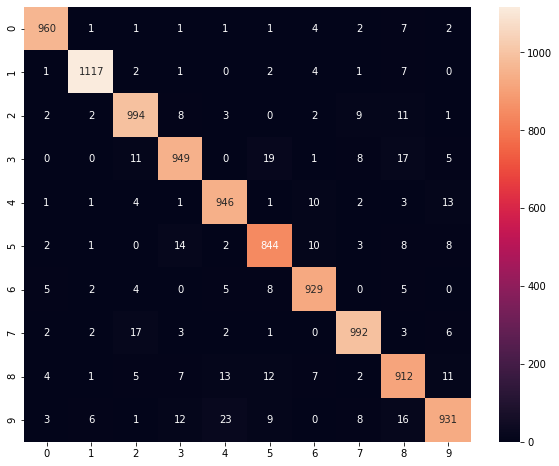

In [9]:
(time_DO, bestModel_DO) = repeatedTrainingAndTesting(model_name = "mlp_DO", dropout = 0.2, batch_normalization = False, M=m)
(top_f1_DO, top_accuracy_DO) = evaluate(bestModel_DO, 'outputs/MLP_heatmap_DO.png')

# Without Dropout, Without Batch-Normalization

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './models/mlp_none', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
_______________________________________________________________________ M=1
INFO

INFO:tensorflow:loss = 0.0, step = 275000
INFO:tensorflow:global_step/sec: 407.592
INFO:tensorflow:loss = 0.0020544557, step = 275100 (0.247 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.0, step = 275200 (0.205 sec)
INFO:tensorflow:global_step/sec: 489.105
INFO:tensorflow:loss = 0.0, step = 275300 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.495
INFO:tensorflow:loss = 6.6937164e-06, step = 275400 (0.203 sec)
INFO:tensorflow:global_step/sec: 489.114
INFO:tensorflow:loss = 0.07366026, step = 275500 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.369
INFO:tensorflow:loss = 4.050468e-06, step = 275600 (0.205 sec)
INFO:tensorflow:global_step/sec: 485.552
INFO:tensorflow:loss = 0.0, step = 275700 (0.206 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.042415682, step = 275800 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.03752324, step = 275900 (0.203 sec)
INFO:tensorflow:global_step/sec: 486.735
INFO:tensorf

INFO:tensorflow:loss = 0.0, step = 281600 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.869
INFO:tensorflow:loss = 0.0, step = 281700 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.395
INFO:tensorflow:loss = 3.0994175e-07, step = 281800 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.0, step = 281900 (0.198 sec)
INFO:tensorflow:global_step/sec: 502.481
INFO:tensorflow:loss = 0.063795514, step = 282000 (0.199 sec)
INFO:tensorflow:global_step/sec: 503.857
INFO:tensorflow:loss = 1.2397727e-07, step = 282100 (0.198 sec)
INFO:tensorflow:global_step/sec: 501.339
INFO:tensorflow:loss = 0.0, step = 282200 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.331
INFO:tensorflow:loss = 0.041012086, step = 282300 (0.198 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.03556096, step = 282400 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.0, step = 282500 (0.200 sec)
INFO:tensorflow:global_step/sec: 506.393
INFO:te

INFO:tensorflow:global_step/sec: 496.356
INFO:tensorflow:loss = 3.819106e-06, step = 288200 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.10350033, step = 288300 (0.199 sec)
INFO:tensorflow:global_step/sec: 499.726
INFO:tensorflow:loss = 4.768371e-09, step = 288400 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.0, step = 288500 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.338
INFO:tensorflow:loss = 7.1525563e-09, step = 288600 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.325
INFO:tensorflow:loss = 0.0, step = 288700 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.655
INFO:tensorflow:loss = 0.0, step = 288800 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.334
INFO:tensorflow:loss = 0.034530055, step = 288900 (0.198 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 2.3841857e-09, step = 289000 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 0.0, step = 289100 (0.200 se

INFO:tensorflow:loss = 0.0, step = 294600 (0.208 sec)
INFO:tensorflow:global_step/sec: 490.171
INFO:tensorflow:loss = 1.46788125e-05, step = 294700 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.508
INFO:tensorflow:loss = 2.6702702e-07, step = 294800 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 0.0, step = 294900 (0.203 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 295000...
INFO:tensorflow:Saving checkpoints for 295000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 295000...
INFO:tensorflow:Loss for final step: 0.67639524.
Training time: --- 13.080730438232422 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:23:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-295000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-300000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 300000...
INFO:tensorflow:Saving checkpoints for 300000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 300000...
INFO:tensorflow:loss = 0.053675774, step = 300000
INFO:tensorflow:global_step/sec: 399.397
INFO:tensorflow:loss = 6.0703558e-05, step = 300100 (0.252 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.0, step = 300200 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.505
INFO:tensorflow:loss = 0.035134345, step = 300300 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 3.7452053e-06, step = 300400 (0.202 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 0.0, step = 306000 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.399
INFO:tensorflow:loss = 0.035711747, step = 306100 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.0, step = 306200 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.0, step = 306300 (0.201 sec)
INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 0.0, step = 306400 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.925
INFO:tensorflow:loss = 0.0, step = 306500 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 2.3841857e-09, step = 306600 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.015277368, step = 306700 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 2.861021e-08, step = 306800 (0.200 sec)
INFO:tensorflow:global_step/sec: 499.87
INFO:tensorflow:loss = 4.0531116e-08, step = 306900 (0.200 sec)
INFO:tensorflow:global_step/sec: 499.052
INFO:t

INFO:tensorflow:loss = 0.2791628, step = 312500 (0.203 sec)
INFO:tensorflow:global_step/sec: 482.057
INFO:tensorflow:loss = 0.0, step = 312600 (0.208 sec)
INFO:tensorflow:global_step/sec: 457.838
INFO:tensorflow:loss = 0.0, step = 312700 (0.221 sec)
INFO:tensorflow:global_step/sec: 486.737
INFO:tensorflow:loss = 0.0, step = 312800 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.505
INFO:tensorflow:loss = 0.051299743, step = 312900 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.0, step = 313000 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.257
INFO:tensorflow:loss = 9.536741e-09, step = 313100 (0.203 sec)
INFO:tensorflow:global_step/sec: 443.663
INFO:tensorflow:loss = 4.768371e-09, step = 313200 (0.225 sec)
INFO:tensorflow:global_step/sec: 479.744
INFO:tensorflow:loss = 0.0, step = 313300 (0.208 sec)
INFO:tensorflow:global_step/sec: 493.921
INFO:tensorflow:loss = 0.0, step = 313400 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.933
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 486.733
INFO:tensorflow:loss = 5.2452034e-08, step = 319100 (0.205 sec)
INFO:tensorflow:global_step/sec: 490.758
INFO:tensorflow:loss = 0.0005338657, step = 319200 (0.204 sec)
INFO:tensorflow:global_step/sec: 497.709
INFO:tensorflow:loss = 9.480205e-05, step = 319300 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.091
INFO:tensorflow:loss = 6.877505e-05, step = 319400 (0.205 sec)
INFO:tensorflow:global_step/sec: 484.389
INFO:tensorflow:loss = 0.012886861, step = 319500 (0.207 sec)
INFO:tensorflow:global_step/sec: 479.749
INFO:tensorflow:loss = 0.04930435, step = 319600 (0.205 sec)
INFO:tensorflow:global_step/sec: 491.514
INFO:tensorflow:loss = 7.1525563e-09, step = 319700 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 0.00062108965, step = 319800 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.456
INFO:tensorflow:loss = 0.0003501137, step = 319900 (0.204 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkp

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40599s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:24:33
INFO:tensorflow:Saving dict for global step 325000: accuracy = 0.9711, average_loss = 2.2362561, global_step = 325000, loss = 2.2114873
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 325000: ./models/mlp_none\model.ckpt-325000
Testing Accuracy: 97.109997%

Testing time: --- 13.317923545837402 seconds ---
_______________________________________________________________________ M=12
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-325000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 325000...
INFO:tensorflow:Saving checkpoints for 325000 into ./models

INFO:tensorflow:loss = 0.030427309, step = 330400 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.498
INFO:tensorflow:loss = 0.0, step = 330500 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.936
INFO:tensorflow:loss = 0.60880876, step = 330600 (0.202 sec)
INFO:tensorflow:global_step/sec: 501.34
INFO:tensorflow:loss = 0.029996669, step = 330700 (0.199 sec)
INFO:tensorflow:global_step/sec: 496.372
INFO:tensorflow:loss = 0.00049186085, step = 330800 (0.201 sec)
INFO:tensorflow:global_step/sec: 492.966
INFO:tensorflow:loss = 0.0, step = 330900 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.371
INFO:tensorflow:loss = 2.4318547e-07, step = 331000 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.836
INFO:tensorflow:loss = 0.021641755, step = 331100 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.0, step = 331200 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.893
INFO:tensorflow:loss = 2.3841857e-09, step = 331300 (0.203 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.0, step = 336900 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.501
INFO:tensorflow:loss = 0.018511035, step = 337000 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.936
INFO:tensorflow:loss = 0.00032928883, step = 337100 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.059
INFO:tensorflow:loss = 0.0, step = 337200 (0.203 sec)
INFO:tensorflow:global_step/sec: 498.838
INFO:tensorflow:loss = 0.0, step = 337300 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.934
INFO:tensorflow:loss = 0.061286114, step = 337400 (0.201 sec)
INFO:tensorflow:global_step/sec: 491.505
INFO:tensorflow:loss = 0.05182425, step = 337500 (0.204 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 2.3841857e-09, step = 337600 (0.200 sec)
INFO:tensorflow:global_step/sec: 491.504
INFO:tensorflow:loss = 1.1920926e-08, step = 337700 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 0.028544242, step = 337800 (0.201 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 497.95
INFO:tensorflow:loss = 0.0, step = 343500 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.0, step = 343600 (0.201 sec)
INFO:tensorflow:global_step/sec: 500.806
INFO:tensorflow:loss = 0.07982411, step = 343700 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.09021698, step = 343800 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 5.342247e-06, step = 343900 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.335
INFO:tensorflow:loss = 0.029782066, step = 344000 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.090707, step = 344100 (0.199 sec)
INFO:tensorflow:global_step/sec: 498
INFO:tensorflow:loss = 0.0, step = 344200 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.381
INFO:tensorflow:loss = 0.050697576, step = 344300 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 0.03465588, step = 344400 (0.200 sec)
INFO:

INFO:tensorflow:Saving checkpoints for 350000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 350000...
INFO:tensorflow:Loss for final step: 0.0.
Training time: --- 12.965922355651855 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:25:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-350000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40596s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:25:42
INFO:tensorflow:Saving dict for global step 350000: accuracy = 0.9728, average_loss = 2.4239888, global_step = 350000, loss = 2.397141
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 350000: ./models/mlp_none\model.ckpt-350000
Testing Accuracy: 97.280002%

Testing time: --- 12.965922355651855 secon

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 355000...
INFO:tensorflow:loss = 0.05105661, step = 355000
INFO:tensorflow:global_step/sec: 415.971
INFO:tensorflow:loss = 0.062040225, step = 355100 (0.242 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 3.576276e-08, step = 355200 (0.200 sec)
INFO:tensorflow:global_step/sec: 503.855
INFO:tensorflow:loss = 0.05348395, step = 355300 (0.199 sec)
INFO:tensorflow:global_step/sec: 499.071
INFO:tensorflow:loss = 4.143418e-06, step = 355400 (0.199 sec)
INFO:tensorflow:global_step/sec: 500.365
INFO:tensorflow:loss = 0.04144104, step = 355500 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.325
INFO:tensorflow:loss = 0.022773152, step = 355600 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.854
INFO:tensorflow:loss = 0.0, step = 355700 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.375
INFO:tensorflow:loss = 0.0, step = 355800 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 486.735
INFO:tensorflow:loss = 9.0358594e-07, step = 361600 (0.204 sec)
INFO:tensorflow:global_step/sec: 496.372
INFO:tensorflow:loss = 0.05066351, step = 361700 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.009256304, step = 361800 (0.203 sec)
INFO:tensorflow:global_step/sec: 492.742
INFO:tensorflow:loss = 0.0, step = 361900 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.0, step = 362000 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.927
INFO:tensorflow:loss = 0.10404927, step = 362100 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 0.0, step = 362200 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.371
INFO:tensorflow:loss = 0.0, step = 362300 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.922
INFO:tensorflow:loss = 0.036569916, step = 362400 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.38
INFO:tensorflow:loss = 0.0, step = 362500 (0.202 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 490.267
INFO:tensorflow:loss = 0.0, step = 368200 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.03137274, step = 368300 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 0.0, step = 368400 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.37
INFO:tensorflow:loss = 0.044658862, step = 368500 (0.202 sec)
INFO:tensorflow:global_step/sec: 495.593
INFO:tensorflow:loss = 0.00012166395, step = 368600 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.377
INFO:tensorflow:loss = 0.1304642, step = 368700 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.12812163, step = 368800 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.925
INFO:tensorflow:loss = 0.055334903, step = 368900 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.00020924403, step = 369000 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.06764183, step = 369100 (

INFO:tensorflow:loss = 4.768371e-09, step = 374700 (0.202 sec)
INFO:tensorflow:global_step/sec: 501.335
INFO:tensorflow:loss = 0.0, step = 374800 (0.200 sec)
INFO:tensorflow:global_step/sec: 494.055
INFO:tensorflow:loss = 9.9129174e-05, step = 374900 (0.201 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 375000...
INFO:tensorflow:Saving checkpoints for 375000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 375000...
INFO:tensorflow:Loss for final step: 0.038570594.
Training time: --- 13.000334978103638 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:26:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-375000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40994s
INFO:tensorflow:Finished

INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-380000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 380000...
INFO:tensorflow:Saving checkpoints for 380000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 380000...
INFO:tensorflow:loss = 4.768371e-09, step = 380000
INFO:tensorflow:global_step/sec: 407.591
INFO:tensorflow:loss = 0.0, step = 380100 (0.249 sec)
INFO:tensorflow:global_step/sec: 489.107
INFO:tensorflow:loss = 0.0035999191, step = 380200 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 0.06783556, step = 380300 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.0, step = 380400 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.358
INFO:tensorflow:loss = 1.5854207e-06, step = 380500 (0.201 sec)
INFO:tensorflow:global_step/sec: 492.879
INFO:te

INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.0, step = 386200 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.921
INFO:tensorflow:loss = 1.3583548, step = 386300 (0.205 sec)
INFO:tensorflow:global_step/sec: 486.698
INFO:tensorflow:loss = 5.854705e-06, step = 386400 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.05255166, step = 386500 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.0, step = 386600 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.066872425, step = 386700 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.509
INFO:tensorflow:loss = 0.0, step = 386800 (0.203 sec)
INFO:tensorflow:global_step/sec: 489.11
INFO:tensorflow:loss = 0.034183554, step = 386900 (0.204 sec)
INFO:tensorflow:global_step/sec: 493.92
INFO:tensorflow:loss = 0.03989869, step = 387000 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.933
INFO:tensorflow:loss = 0.0, step = 387100 (0.203 sec)
INFO:te

INFO:tensorflow:loss = 0.10454467, step = 392700 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.508
INFO:tensorflow:loss = 3.4093566e-07, step = 392800 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.921
INFO:tensorflow:loss = 0.0, step = 392900 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.933
INFO:tensorflow:loss = 0.07754306, step = 393000 (0.202 sec)
INFO:tensorflow:global_step/sec: 492.632
INFO:tensorflow:loss = 4.7444735e-07, step = 393100 (0.202 sec)
INFO:tensorflow:global_step/sec: 492.953
INFO:tensorflow:loss = 0.0, step = 393200 (0.205 sec)
INFO:tensorflow:global_step/sec: 482.052
INFO:tensorflow:loss = 0.0, step = 393300 (0.205 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 5.0681383e-06, step = 393400 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.504
INFO:tensorflow:loss = 0.04300685, step = 393500 (0.204 sec)
INFO:tensorflow:global_step/sec: 489.111
INFO:tensorflow:loss = 0.0, step = 393600 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.374


INFO:tensorflow:loss = 0.0039033932, step = 399300 (0.202 sec)
INFO:tensorflow:global_step/sec: 469.331
INFO:tensorflow:loss = 0.0, step = 399400 (0.213 sec)
INFO:tensorflow:global_step/sec: 453.67
INFO:tensorflow:loss = 1.830725e-05, step = 399500 (0.219 sec)
INFO:tensorflow:global_step/sec: 501.371
INFO:tensorflow:loss = 1.1920926e-08, step = 399600 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.339
INFO:tensorflow:loss = 0.09269705, step = 399700 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.834
INFO:tensorflow:loss = 0.0, step = 399800 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.85
INFO:tensorflow:loss = 0.03516575, step = 399900 (0.200 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 400000...
INFO:tensorflow:Saving checkpoints for 400000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 400000...
INFO:tensorflow:Loss for final step: 1.50651.
Training time: --- 13.090052127838135 seconds ---


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 405000: ./models/mlp_none\model.ckpt-405000
Testing Accuracy: 96.880001%

Testing time: --- 13.68352198600769 seconds ---
_______________________________________________________________________ M=28
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-405000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 405000...
INFO:tensorflow:Saving checkpoints for 405000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 405000...
INFO:tensorflow:loss = 0.038963936, step = 405000
INFO:tensorflow:global_step/sec: 403.654
INFO:tensorflow:loss = 3.8167173e-06, step = 405100 (0.251 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.04877085, step = 410700 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.925
INFO:tensorflow:loss = 0.05616144, step = 410800 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.000529383, step = 410900 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 7.1525563e-09, step = 411000 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.846
INFO:tensorflow:loss = 7.1525563e-09, step = 411100 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.014661554, step = 411200 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.0, step = 411300 (0.205 sec)
INFO:tensorflow:global_step/sec: 492.703
INFO:tensorflow:loss = 0.0, step = 411400 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.37
INFO:tensorflow:loss = 0.047737483, step = 411500 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.905
INFO:tensorflow:loss = 0.0, step = 411600 (0.201 sec)
INFO:tensorflow:global_step/sec: 4

INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 0.03989844, step = 417300 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.833
INFO:tensorflow:loss = 0.0, step = 417400 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.38
INFO:tensorflow:loss = 1.860945e-05, step = 417500 (0.200 sec)
INFO:tensorflow:global_step/sec: 503.856
INFO:tensorflow:loss = 0.0, step = 417600 (0.199 sec)
INFO:tensorflow:global_step/sec: 502.86
INFO:tensorflow:loss = 7.62938e-08, step = 417700 (0.198 sec)
INFO:tensorflow:global_step/sec: 502.758
INFO:tensorflow:loss = 0.0, step = 417800 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.387
INFO:tensorflow:loss = 0.034280546, step = 417900 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.322
INFO:tensorflow:loss = 0.0, step = 418000 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.853
INFO:tensorflow:loss = 2.3841857e-09, step = 418100 (0.200 sec)
INFO:tensorflow:global_step/sec: 506.404
INFO:tensorflow:loss = 0.03977377, step = 418200 (0.198 sec)
INF

INFO:tensorflow:loss = 0.038097546, step = 423800 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 3.4857396e-05, step = 423900 (0.202 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 2.3841857e-09, step = 424000 (0.199 sec)
INFO:tensorflow:global_step/sec: 500.142
INFO:tensorflow:loss = 0.0056827134, step = 424100 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 0.05260442, step = 424200 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 0.040160894, step = 424300 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.841
INFO:tensorflow:loss = 2.2411221e-07, step = 424400 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.326
INFO:tensorflow:loss = 0.036965095, step = 424500 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.936
INFO:tensorflow:loss = 0.0, step = 424600 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.375
INFO:tensorflow:loss = 0.0, step = 424700 (0.200 sec)
INFO:tensorflow:global_

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:29:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-430000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.41693s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:29:26
INFO:tensorflow:Saving dict for global step 430000: accuracy = 0.9688, average_loss = 3.5924559, global_step = 430000, loss = 3.552666
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 430000: ./models/mlp_none\model.ckpt-430000
Testing Accuracy: 96.880001%

Testing time: --- 13.044550657272339 seconds ---
_______________________________________________________________________ M=33
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode

INFO:tensorflow:loss = 7.247794e-07, step = 435200 (0.205 sec)
INFO:tensorflow:global_step/sec: 493.919
INFO:tensorflow:loss = 0.0, step = 435300 (0.203 sec)
INFO:tensorflow:global_step/sec: 484.385
INFO:tensorflow:loss = 0.0, step = 435400 (0.206 sec)
INFO:tensorflow:global_step/sec: 489.12
INFO:tensorflow:loss = 0.08118157, step = 435500 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.044013243, step = 435600 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.0032398263, step = 435700 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.875
INFO:tensorflow:loss = 0.032669626, step = 435800 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.497
INFO:tensorflow:loss = 0.0, step = 435900 (0.203 sec)
INFO:tensorflow:global_step/sec: 489.119
INFO:tensorflow:loss = 0.0, step = 436000 (0.204 sec)
INFO:tensorflow:global_step/sec: 466.36
INFO:tensorflow:loss = 0.0, step = 436100 (0.214 sec)
INFO:tensorflow:global_step/sec: 491.508
INFO:tensor

INFO:tensorflow:global_step/sec: 489.109
INFO:tensorflow:loss = 0.053304333, step = 441800 (0.205 sec)
INFO:tensorflow:global_step/sec: 491.503
INFO:tensorflow:loss = 0.0, step = 441900 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.378
INFO:tensorflow:loss = 0.053524386, step = 442000 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.0, step = 442100 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.54
INFO:tensorflow:loss = 0.0, step = 442200 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.925
INFO:tensorflow:loss = 0.039094456, step = 442300 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.509
INFO:tensorflow:loss = 3.2970572e-06, step = 442400 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.051667616, step = 442500 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.173
INFO:tensorflow:loss = 0.007439567, step = 442600 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.934
INFO:tensorflow:loss = 1.9445499e-05, step = 442700 (0.

INFO:tensorflow:global_step/sec: 491.497
INFO:tensorflow:loss = 0.0776598, step = 448300 (0.203 sec)
INFO:tensorflow:global_step/sec: 470.81
INFO:tensorflow:loss = 0.0, step = 448400 (0.213 sec)
INFO:tensorflow:global_step/sec: 482.052
INFO:tensorflow:loss = 1.2401073e-05, step = 448500 (0.206 sec)
INFO:tensorflow:global_step/sec: 491.51
INFO:tensorflow:loss = 0.0, step = 448600 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.0, step = 448700 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.499
INFO:tensorflow:loss = 0.0, step = 448800 (0.203 sec)
INFO:tensorflow:global_step/sec: 486.74
INFO:tensorflow:loss = 0.0, step = 448900 (0.204 sec)
INFO:tensorflow:global_step/sec: 486.733
INFO:tensorflow:loss = 2.3841857e-09, step = 449000 (0.206 sec)
INFO:tensorflow:global_step/sec: 491.51
INFO:tensorflow:loss = 0.05293992, step = 449100 (0.203 sec)
INFO:tensorflow:global_step/sec: 482.054
INFO:tensorflow:loss = 0.0, step = 449200 (0.207 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 484.384
INFO:tensorflow:loss = 0.0441031, step = 454900 (0.206 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 455000...
INFO:tensorflow:Saving checkpoints for 455000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 455000...
INFO:tensorflow:Loss for final step: 5.7220376e-08.
Training time: --- 13.081532001495361 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:30:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-455000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.41095s
INFO:tensorflow:Finished evaluation at 2022-09-29-14:30:36
INFO:tensorflow:Saving dict for global step 455000: accuracy = 0.9692, average_loss = 3.9546485, global_step = 455000, loss =

INFO:tensorflow:Saving checkpoints for 460000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 460000...
INFO:tensorflow:loss = 0.039409444, step = 460000
INFO:tensorflow:global_step/sec: 360.674
INFO:tensorflow:loss = 0.0, step = 460100 (0.279 sec)
INFO:tensorflow:global_step/sec: 441.703
INFO:tensorflow:loss = 0.59281677, step = 460200 (0.226 sec)
INFO:tensorflow:global_step/sec: 443.663
INFO:tensorflow:loss = 7.1525563e-09, step = 460300 (0.225 sec)
INFO:tensorflow:global_step/sec: 368.632
INFO:tensorflow:loss = 0.0, step = 460400 (0.272 sec)
INFO:tensorflow:global_step/sec: 417.78
INFO:tensorflow:loss = 0.0, step = 460500 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.044
INFO:tensorflow:loss = 0.0, step = 460600 (0.239 sec)
INFO:tensorflow:global_step/sec: 439.771
INFO:tensorflow:loss = 0.0, step = 460700 (0.226 sec)
INFO:tensorflow:global_step/sec: 453.7
INFO:tensorflow:loss = 7.367001e-07, step = 460800 (0.218 sec)
INFO:te

INFO:tensorflow:global_step/sec: 495.636
INFO:tensorflow:loss = 0.039120644, step = 466500 (0.203 sec)
INFO:tensorflow:global_step/sec: 489.014
INFO:tensorflow:loss = 0.0, step = 466600 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.376
INFO:tensorflow:loss = 0.0, step = 466700 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 0.0, step = 466800 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.039198864, step = 466900 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.039163426, step = 467000 (0.201 sec)
INFO:tensorflow:global_step/sec: 404.188
INFO:tensorflow:loss = 0.041033953, step = 467100 (0.248 sec)
INFO:tensorflow:global_step/sec: 496.372
INFO:tensorflow:loss = 0.00014502916, step = 467200 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.138
INFO:tensorflow:loss = 0.0, step = 467300 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.401
INFO:tensorflow:loss = 0.014205879, step = 467400 (0.200 sec)


INFO:tensorflow:global_step/sec: 486.735
INFO:tensorflow:loss = 0.0, step = 473100 (0.205 sec)
INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 0.01417989, step = 473200 (0.203 sec)
INFO:tensorflow:global_step/sec: 486.715
INFO:tensorflow:loss = 0.0, step = 473300 (0.205 sec)
INFO:tensorflow:global_step/sec: 496.386
INFO:tensorflow:loss = 0.0, step = 473400 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.934
INFO:tensorflow:loss = 2.0265477e-07, step = 473500 (0.202 sec)
INFO:tensorflow:global_step/sec: 495.324
INFO:tensorflow:loss = 0.09416617, step = 473600 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.508
INFO:tensorflow:loss = 0.0, step = 473700 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.897
INFO:tensorflow:loss = 9.536741e-09, step = 473800 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.404
INFO:tensorflow:loss = 2.3841844e-08, step = 473900 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.9
INFO:tensorflow:loss = 0.0, step = 474000 (0.200 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 491.358
INFO:tensorflow:loss = 0.11380758, step = 479700 (0.203 sec)
INFO:tensorflow:global_step/sec: 475.201
INFO:tensorflow:loss = 0.03817841, step = 479800 (0.210 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 1.6753516, step = 479900 (0.200 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 480000...
INFO:tensorflow:Saving checkpoints for 480000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 480000...
INFO:tensorflow:Loss for final step: 0.0.
Training time: --- 13.129294633865356 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-29T14:31:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-480000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time :

INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-485000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 485000...
INFO:tensorflow:Saving checkpoints for 485000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 485000...
INFO:tensorflow:loss = 3.0133838e-06, step = 485000
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 0.07815376, step = 485100 (0.246 sec)
INFO:tensorflow:global_step/sec: 498.843
INFO:tensorflow:loss = 0.0, step = 485200 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.831
INFO:tensorflow:loss = 0.0, step = 485300 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.851
INFO:tensorflow:loss = 0.039474405, step = 485400 (0.200 sec)
INFO:tensorflow:global_step/sec: 501.331
INFO:tensorflow:loss = 0.034763638, step = 485500 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.85
INFO:tens

INFO:tensorflow:loss = 0.037695006, step = 491200 (0.203 sec)
INFO:tensorflow:global_step/sec: 498.845
INFO:tensorflow:loss = 0.06675411, step = 491300 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 1.3811411, step = 491400 (0.199 sec)
INFO:tensorflow:global_step/sec: 502.514
INFO:tensorflow:loss = 0.03790008, step = 491500 (0.199 sec)
INFO:tensorflow:global_step/sec: 503.858
INFO:tensorflow:loss = 0.0, step = 491600 (0.198 sec)
INFO:tensorflow:global_step/sec: 503.858
INFO:tensorflow:loss = 0.0, step = 491700 (0.199 sec)
INFO:tensorflow:global_step/sec: 496.373
INFO:tensorflow:loss = 0.09149186, step = 491800 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.836
INFO:tensorflow:loss = 0.11314161, step = 491900 (0.200 sec)
INFO:tensorflow:global_step/sec: 508.979
INFO:tensorflow:loss = 0.04364486, step = 492000 (0.196 sec)
INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 0.17514718, step = 492100 (0.201 sec)
INFO:tensorflow:global_step/sec: 503

INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.0, step = 497800 (0.198 sec)
INFO:tensorflow:global_step/sec: 501.337
INFO:tensorflow:loss = 7.152545e-08, step = 497900 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.0, step = 498000 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.813
INFO:tensorflow:loss = 0.0, step = 498100 (0.201 sec)
INFO:tensorflow:global_step/sec: 503.996
INFO:tensorflow:loss = 0.0, step = 498200 (0.198 sec)
INFO:tensorflow:global_step/sec: 501.337
INFO:tensorflow:loss = 1.1348407e-06, step = 498300 (0.199 sec)
INFO:tensorflow:global_step/sec: 498.84
INFO:tensorflow:loss = 0.0, step = 498400 (0.201 sec)
INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.06684151, step = 498500 (0.198 sec)
INFO:tensorflow:global_step/sec: 502.419
INFO:tensorflow:loss = 2.3841857e-09, step = 498600 (0.199 sec)
INFO:tensorflow:global_step/sec: 501.336
INFO:tensorflow:loss = 0.05147296, step = 498700 (0.199 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 491.507
INFO:tensorflow:loss = 0.04938022, step = 504400 (0.204 sec)
INFO:tensorflow:global_step/sec: 491.506
INFO:tensorflow:loss = 0.0, step = 504500 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.929
INFO:tensorflow:loss = 0.0, step = 504600 (0.203 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:loss = 0.040363006, step = 504700 (0.202 sec)
INFO:tensorflow:global_step/sec: 466.355
INFO:tensorflow:loss = 0.021033175, step = 504800 (0.215 sec)
INFO:tensorflow:global_step/sec: 494.304
INFO:tensorflow:loss = 0.039867148, step = 504900 (0.201 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 505000...
INFO:tensorflow:Saving checkpoints for 505000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 505000...
INFO:tensorflow:Loss for final step: 1.3828229e-07.
Training time: --- 13.271645545959473 seconds ---
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done ca

Testing Accuracy: 96.579999%

Testing time: --- 13.115263223648071 seconds ---
_______________________________________________________________________ M=49
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mlp_none\model.ckpt-510000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 510000...
INFO:tensorflow:Saving checkpoints for 510000 into ./models/mlp_none\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 510000...
INFO:tensorflow:loss = 5.245202e-08, step = 510000
INFO:tensorflow:global_step/sec: 411.563
INFO:tensorflow:loss = 0.0, step = 510100 (0.245 sec)
INFO:tensorflow:global_step/sec: 501.344
INFO:tensorflow:loss = 0.043364316, step = 510200 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.843

INFO:tensorflow:global_step/sec: 493.896
INFO:tensorflow:loss = 0.0, step = 515900 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.873
INFO:tensorflow:loss = 0.0, step = 516000 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 0.0, step = 516100 (0.201 sec)
INFO:tensorflow:global_step/sec: 496.374
INFO:tensorflow:loss = 0.04547138, step = 516200 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.37
INFO:tensorflow:loss = 0.0, step = 516300 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.93
INFO:tensorflow:loss = 0.0, step = 516400 (0.204 sec)
INFO:tensorflow:global_step/sec: 492.238
INFO:tensorflow:loss = 0.0, step = 516500 (0.202 sec)
INFO:tensorflow:global_step/sec: 496.371
INFO:tensorflow:loss = 0.039109863, step = 516600 (0.201 sec)
INFO:tensorflow:global_step/sec: 493.926
INFO:tensorflow:loss = 0.0, step = 516700 (0.201 sec)
INFO:tensorflow:global_step/sec: 498.846
INFO:tensorflow:loss = 0.0, step = 516800 (0.200 sec)
INFO:tensorflow:global_step/sec: 493.

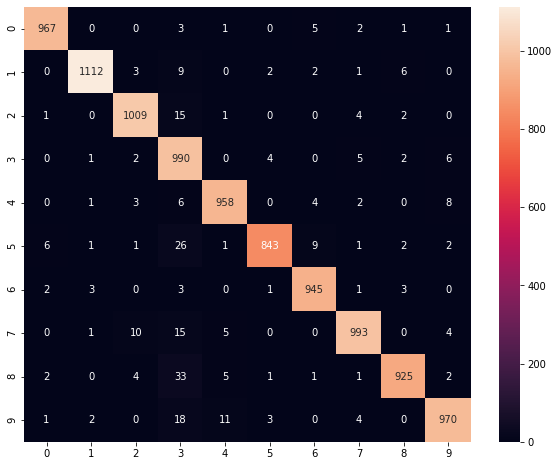

In [10]:
(time_none, bestModel_none) = repeatedTrainingAndTesting(model_name = "mlp_none", dropout = False, batch_normalization = False, M=m)
(top_f1_none, top_accuracy_none) = evaluate(bestModel_none, 'outputs/MLP_heatmap_none.png')

# Save Results

In [14]:
data = {'Accuracy_DO_BN': top_accuracy_DO_BN, 'Time_DO_BN': time_DO_BN,'F1_DO_BN': top_f1_DO_BN,
        'Accuracy_BN' : top_accuracy_BN, 'Time_BN' : time_BN, 'F1_BN': top_f1_BN,
        'Accuracy_DO' : top_accuracy_DO, 'Time_DO': time_DO, 'F1_DO': top_f1_DO, 
        'Accuracy_NONE': top_accuracy_none, 'Time_NONE': time_none, 'F1_NONE' : top_f1_none}

df = pd.DataFrame(data,index=[0])

df.to_csv('outputs/MLP.csv')